This script is written by Anika Zaman under supervision of Dr Hiu Yung Wong as part of Thesis dissertation work, EE department, SJSU

In [34]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token='<YOUR_TOKEN>', overwrite=True,set_as_default=True)
 
# Load saved credentials
service = QiskitRuntimeService()

In [35]:
service.backend()
!pip install qiskit[visualization]

# Imports for Qiskit
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit.compiler import transpile, assemble
from qiskit import QuantumCircuit, transpile, IBMQ, execute #i added to remove error
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import *
from qiskit import IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
from copy import deepcopy
from matplotlib import pyplot as plt
from qiskit import *
from qiskit.tools.visualization import *
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

from qiskit import QuantumCircuit, assemble
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
#sim = Aer.get_backend('aer_simulator')
from IPython.display import clear_output
#Quantum Volume
from IPython.display import clear_output

#Import Qiskit classes
import qiskit
from qiskit import assemble, transpile
#from qiskit.providers.aer.noise import NoiseModel
#from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error

#Import the qv function
#import qiskit.ignis.verification.quantum_volume as qv
#Import qv measurement classes
#from qiskit_experiments.framework import BatchExperiment
#from qiskit_experiments.library import QuantumVolume
#from qiskit import Aer
#from qiskit.providers.aer import AerSimulator

from qiskit.circuit.random import random_circuit
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.tools.monitor import job_monitor

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
#from qiskit.providers.aer import QasmSimulator
from qiskit import *
import numpy as np

HHL circuit

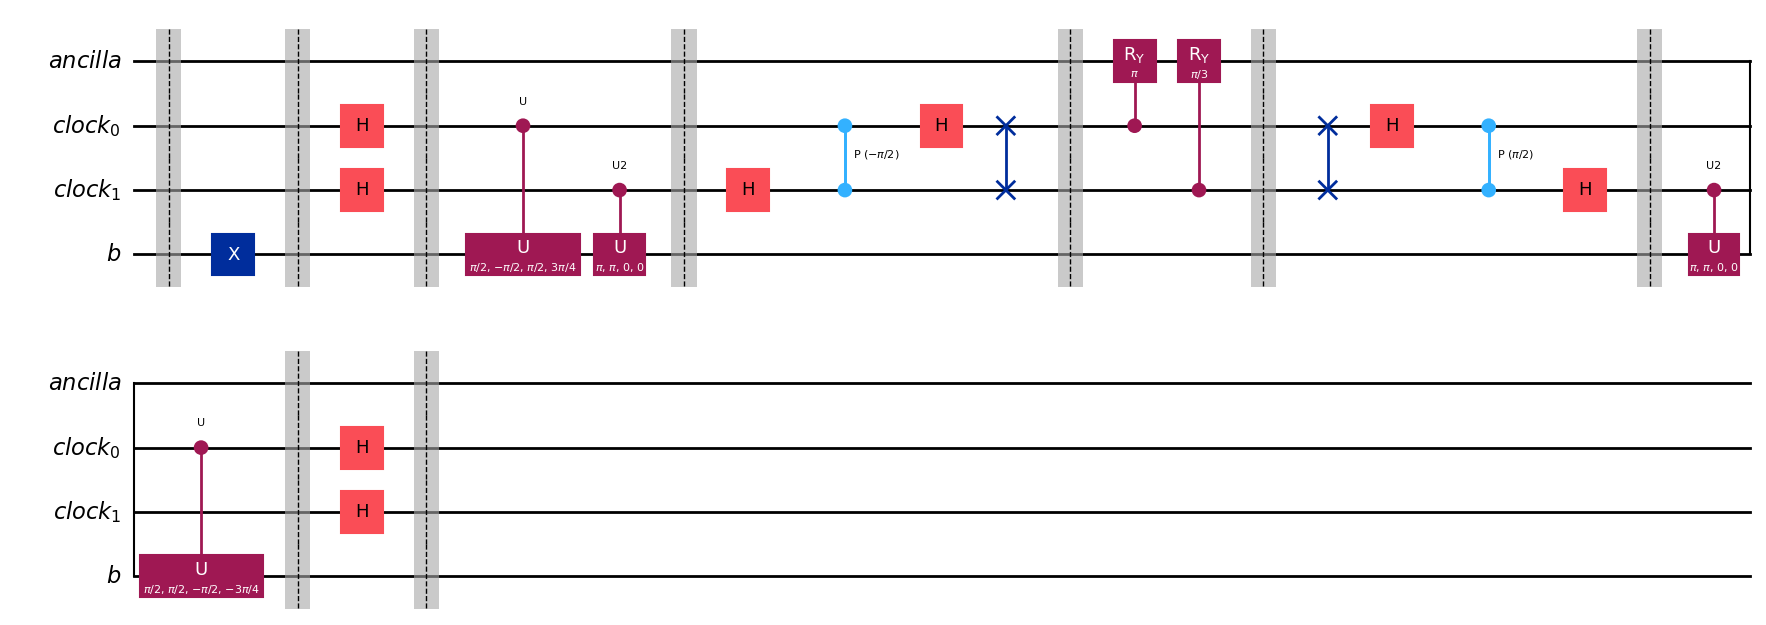

In [36]:
# Register declaration
clock = QuantumRegister(2, name='clock')
input_ = QuantumRegister(1, name='b')
ancilla = QuantumRegister(1, name='ancilla')
circuit = QuantumCircuit(ancilla, clock, input_)
#---------------Psi 0--------------------------
circuit.barrier()
circuit.x(input_);
#---------------Psi 1--------------------------
circuit.barrier();
circuit.h(clock[0]);
circuit.h(clock[1]);
#--------------Psi 2---------------------------
circuit.barrier();
# e^{i*A*t}
circuit.cu(np.pi/2, -np.pi/2, np.pi/2, 3*np.pi/4, clock[0], input_, label='U');
    
# e^{i*A*t*2}
circuit.cu(np.pi, np.pi, 0, 0, clock[1], input_, label='U2');

#--------------Psi 3---------------------------
circuit.barrier();     
circuit.h(clock[1]);
for j in reversed(range(2)):
    for k in reversed(range(j+1,2)):
        circuit.cp(-np.pi/float(2**(k-j)), clock[k], clock[j]); #cu1 changes to cp in the new version
circuit.h(clock[0]);
circuit.swap(clock[0], clock[1]);
#--------------Psi 4---------------------------
circuit.barrier();
circuit.cry(np.pi, clock[0], ancilla);
circuit.cry(np.pi/3, clock[1], ancilla);
#--------------Psi 5---------------------------
circuit.barrier();
circuit.swap(clock[0], clock[1]);
circuit.h(clock[0]);
for j in reversed(range(2)):
    for k in reversed(range(j+1,2)):
        circuit.cp(np.pi/float(2**(k-j)), clock[k], clock[j]);
circuit.h(clock[1])
#--------------Psi 6---------------------------
circuit.barrier();
circuit.cu(np.pi, np.pi, 0, 0, clock[1], input_, label='U2');
# e^{i*A*t}
circuit.cu(np.pi/2, np.pi/2, -np.pi/2, -3*np.pi/4, clock[0], input_, label='U');
#--------------Psi 7--------------------------
circuit.barrier();
circuit.h(clock[0]);
circuit.h(clock[1]);
#--------------Psi 8---------------------------
circuit.barrier();

circuit.draw(output='mpl', style = 'iqp')

Psi 1 data

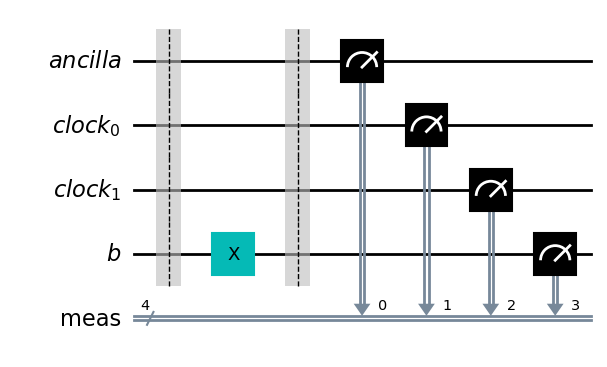

In [37]:
# Register declaration
clock = QuantumRegister(2, name='clock')
input_ = QuantumRegister(1, name='b')
ancilla = QuantumRegister(1, name='ancilla')
circuit0 = QuantumCircuit(ancilla, clock, input_)
#---------------Psi 0--------------------------
circuit0.barrier()
circuit0.x(input_);
circuit0.measure_all()
circuit0.draw(output='mpl',idle_wires=False)

transpile the circuit

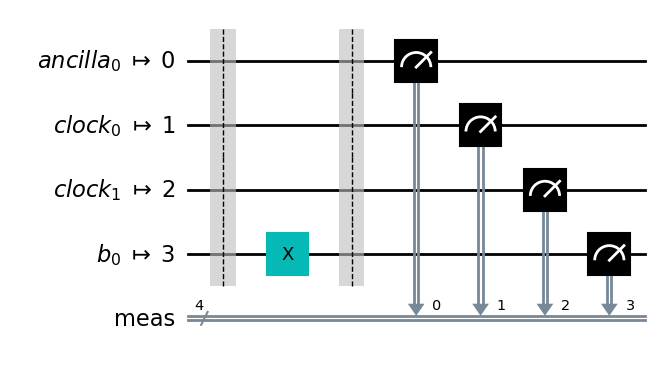

In [38]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()
transpiled_ckt0 = transpile(circuit0, provider.get_backend('ibm_brisbane'), seed_transpiler = 13,optimization_level=0) 
transpiled_ckt0.draw(output = 'mpl',idle_wires=False)

In [39]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Options
 
service = QiskitRuntimeService()
options = Options()
options.resilience_level = 0
options.optimization_level = 0
#backend = service.least_busy(operational=True, simulator=False)
 
example_circuit = transpiled_ckt0
service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
sampler = Sampler(backend, options=options)
job = sampler.run(example_circuit)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: cr3zvny98ct0008sh3a0
SamplerResult(quasi_dists=[{12: 0.003, 2: 0.00025, 0: 0.05675, 8: 0.88475, 1: 0.00275, 4: 0.001, 9: 0.041, 10: 0.0105}], metadata=[{'shots': 4000, 'circuit_metadata': {}}])


C:\Users\mridu\AppData\Local\Temp\ipykernel_17096\2942949.py:2: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(binary_prob)


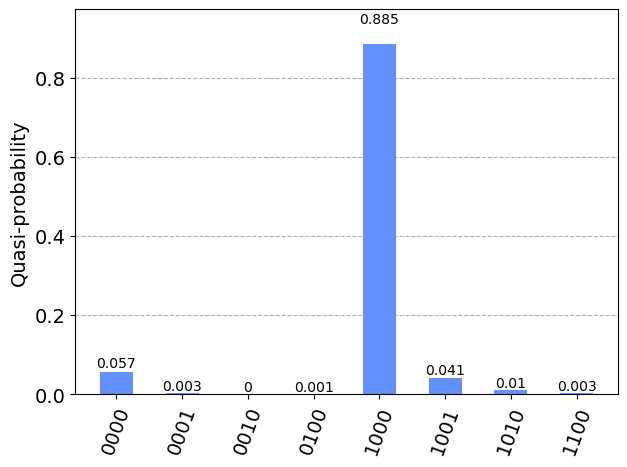

In [40]:
binary_prob = [quasi_dist.binary_probabilities() for quasi_dist in result.quasi_dists]
plot_histogram(binary_prob)

In [41]:
import csv

data = binary_prob

# Extract all possible combinations of 4-bit binary headings
all_combinations = [format(i, '04b') for i in range(16)]

# Iterate over the data and fill in missing values with zeros
filled_data = []
for d in data:
    filled_row = {key: d.get(key, 0) for key in all_combinations}
    filled_data.append(filled_row)

# Write the filled data to a CSV file
csv_file = "data.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=all_combinations)
    writer.writeheader()
    for row in filled_data:
        writer.writerow(row)

print(f"Data has been written to {csv_file}")

Data has been written to data.csv


Psi 2 data

C:\Users\mridu\AppData\Roaming\Python\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


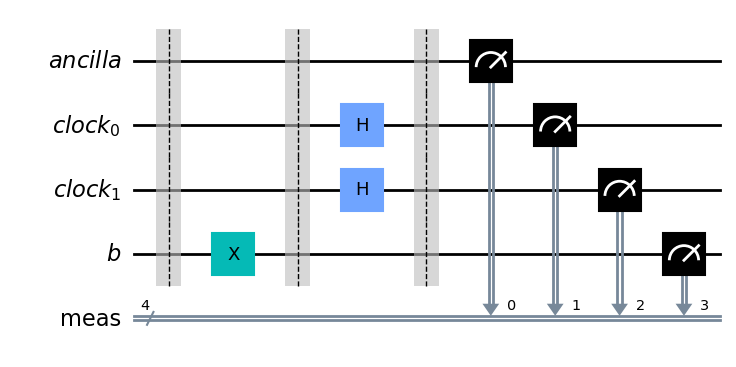

In [42]:
# Register declaration
clock = QuantumRegister(2, name='clock')
input_ = QuantumRegister(1, name='b')
ancilla = QuantumRegister(1, name='ancilla')
circuit1 = QuantumCircuit(ancilla, clock, input_)
#---------------Psi 0--------------------------
circuit1.barrier()
circuit1.x(input_);
#---------------Psi 1--------------------------
circuit1.barrier();
circuit1.h(clock[0]);
circuit1.h(clock[1]);
circuit1.measure_all()
circuit1.draw(output='mpl',idle_wires=False)
#--------------Psi 2---------------------------

transpile the circuit

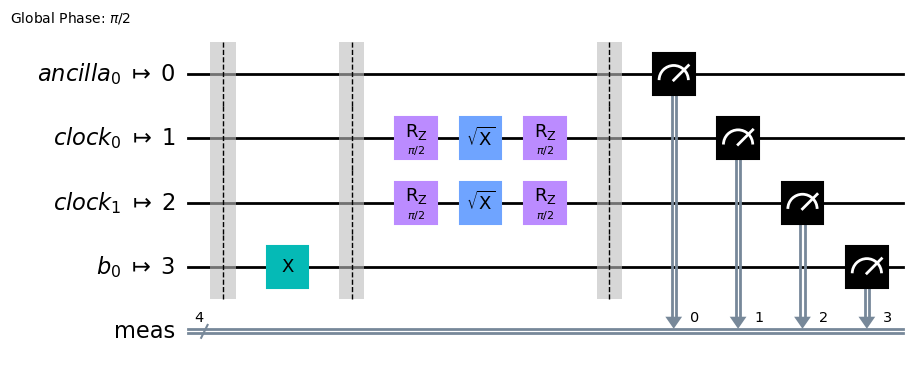

In [44]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()
transpiled_ckt1 = transpile(circuit1, provider.get_backend('ibm_brisbane'), seed_transpiler = 13,optimization_level=0) 
transpiled_ckt1.draw(output = 'mpl',idle_wires=False)

In [45]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Options
 
service = QiskitRuntimeService()
options = Options()
options.resilience_level = 0
options.optimization_level = 0
#backend = service.least_busy(operational=True, simulator=False)
 
example_circuit = transpiled_ckt1
service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
sampler = Sampler(backend, options=options)
job = sampler.run(example_circuit)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: cr452rkbbwk00089yw5g
SamplerResult(quasi_dists=[{6: 0.00725, 8: 0.2135, 7: 0.00075, 12: 0.21525, 2: 0.0095, 4: 0.00975, 3: 0.0015, 1: 0.0015, 11: 0.01675, 9: 0.0145, 0: 0.00975, 5: 0.001, 13: 0.0135, 10: 0.2305, 15: 0.01675, 14: 0.23825}], metadata=[{'shots': 4000, 'circuit_metadata': {}}])


C:\Users\mridu\AppData\Local\Temp\ipykernel_17096\2942949.py:2: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(binary_prob)


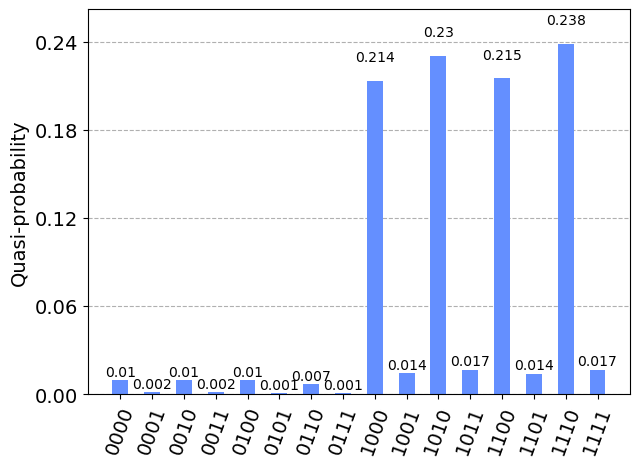

In [46]:
binary_prob = [quasi_dist.binary_probabilities() for quasi_dist in result.quasi_dists]
plot_histogram(binary_prob)

In [47]:
import csv

data1 = binary_prob

# Fill in missing values in data1 with zeros
filled_data1 = []
for d in data1:
    filled_row = {key: d.get(key, 0) for key in all_combinations}
    filled_data1.append(filled_row)

# Append filled_data1 to filled_data
filled_data.extend(filled_data1)

# Write the updated filled_data to the same CSV file
csv_file = "data.csv"
with open(csv_file, mode='a', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=all_combinations)
    for row in filled_data1:
        writer.writerow(row)

print(f"Data1 has been added to {csv_file}")

Data1 has been added to data.csv


Psi 3 data

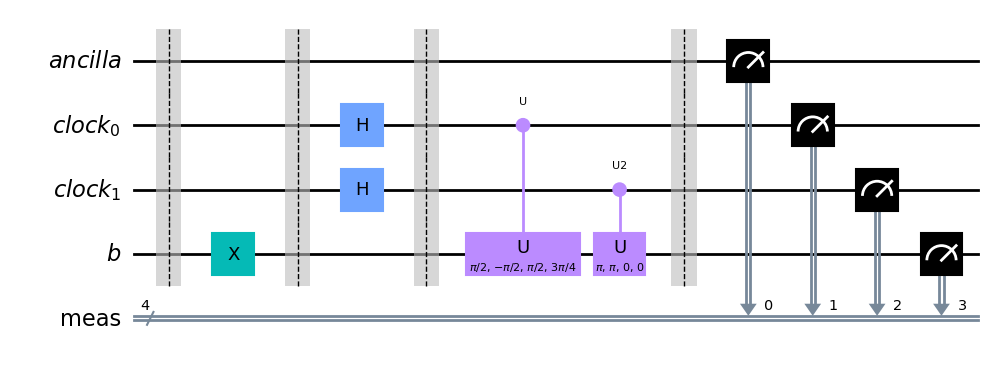

In [48]:
# Register declaration
clock = QuantumRegister(2, name='clock')
input_ = QuantumRegister(1, name='b')
ancilla = QuantumRegister(1, name='ancilla')
circuit2 = QuantumCircuit(ancilla, clock, input_)
#---------------Psi 0--------------------------
circuit2.barrier()
circuit2.x(input_);
#---------------Psi 1--------------------------
circuit2.barrier();
circuit2.h(clock[0]);
circuit2.h(clock[1]);
#--------------Psi 2---------------------------
circuit2.barrier();
# e^{i*A*t}
circuit2.cu(np.pi/2, -np.pi/2, np.pi/2, 3*np.pi/4, clock[0], input_, label='U');
    
# e^{i*A*t*2}
circuit2.cu(np.pi, np.pi, 0, 0, clock[1], input_, label='U2');
circuit2.measure_all()
circuit2.draw(output='mpl',idle_wires=False)
#--------------Psi 3---------------------------

Transpile the circuit

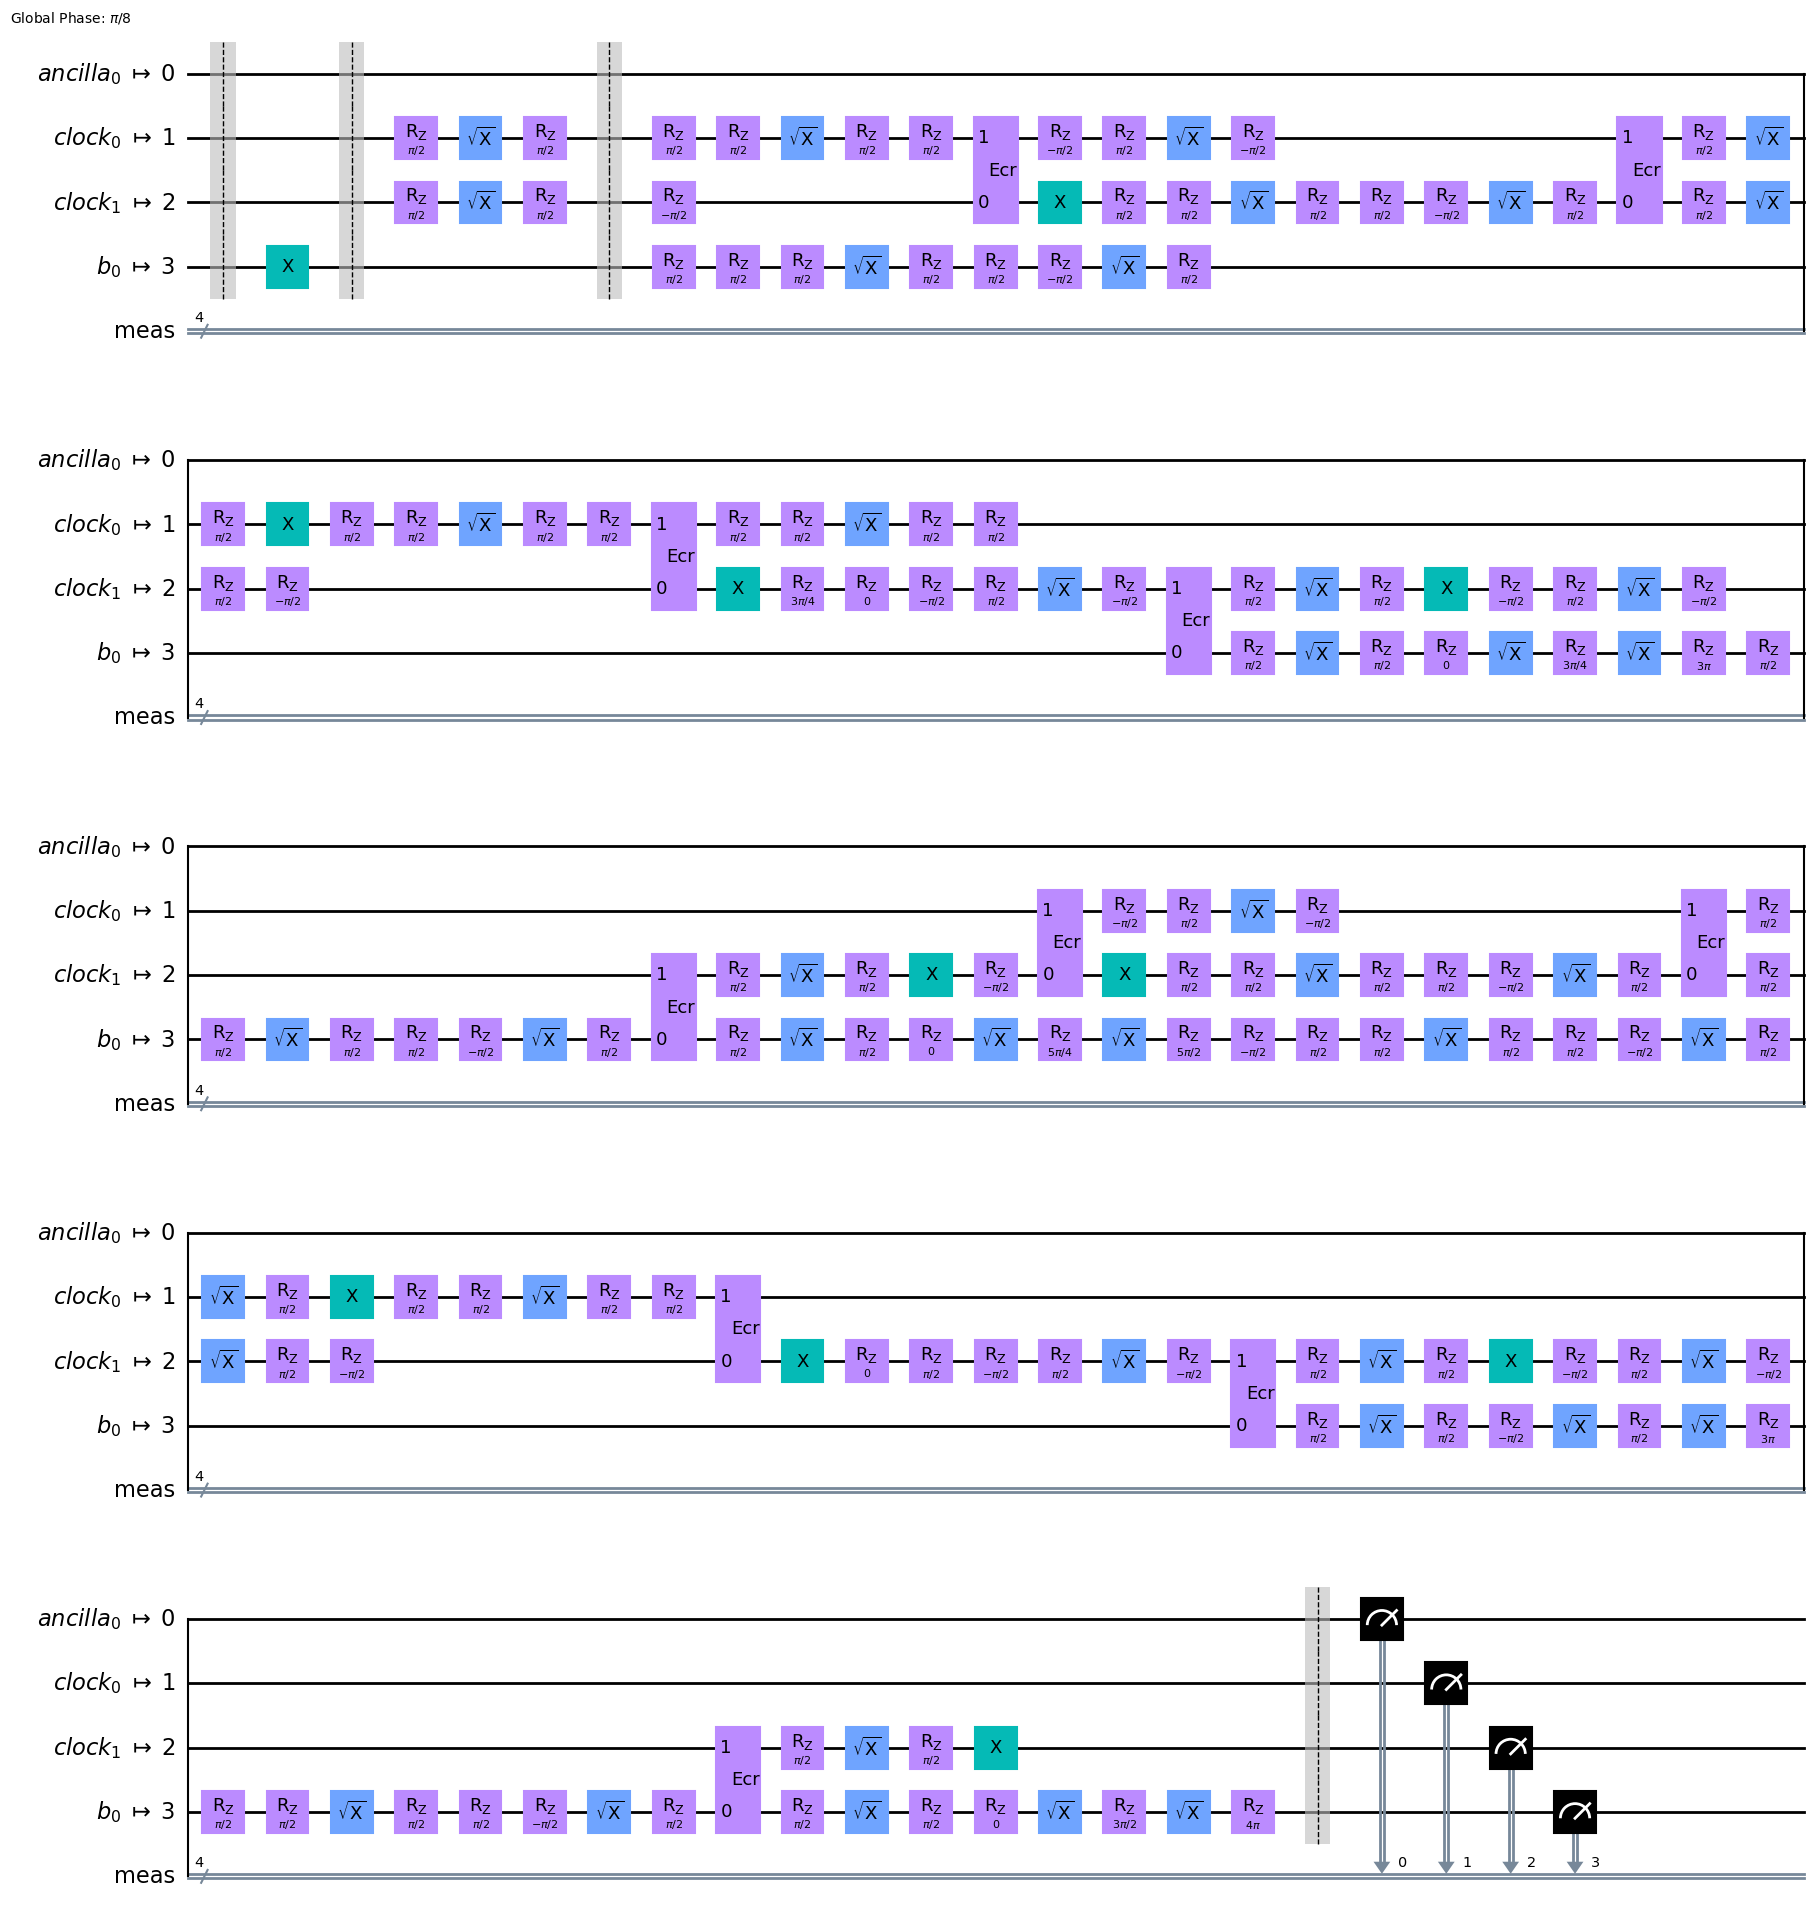

In [49]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()
transpiled_ckt2 = transpile(circuit2, provider.get_backend('ibm_brisbane'), seed_transpiler = 13,optimization_level=0) 
transpiled_ckt2.draw(output = 'mpl',idle_wires=False)

In [50]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Options
 
service = QiskitRuntimeService()
options = Options()
options.resilience_level = 0
options.optimization_level = 0
#backend = service.least_busy(operational=True, simulator=False)
 
example_circuit = transpiled_ckt2
service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
sampler = Sampler(backend, options=options)
job = sampler.run(example_circuit)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: cr45szq0dz600086nkkg
SamplerResult(quasi_dists=[{9: 0.008, 11: 0.0045, 7: 0.00325, 5: 0.007, 13: 0.0045, 15: 0.0055, 0: 0.1055, 4: 0.154, 12: 0.10075, 10: 0.08875, 6: 0.0405, 14: 0.104, 8: 0.173, 3: 0.0095, 2: 0.18525, 1: 0.006}], metadata=[{'shots': 4000, 'circuit_metadata': {}}])


C:\Users\mridu\AppData\Local\Temp\ipykernel_17096\2942949.py:2: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(binary_prob)


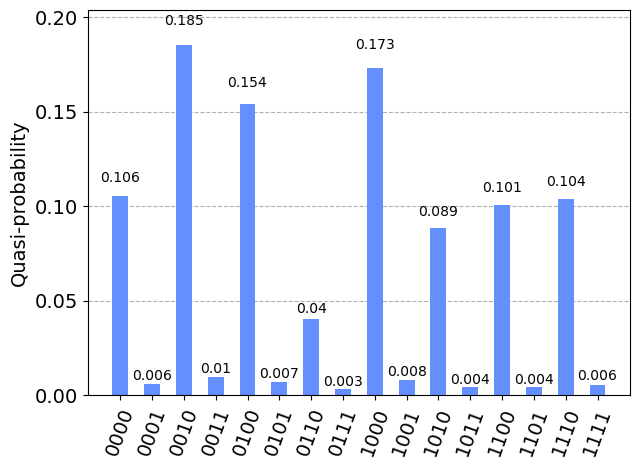

In [51]:
binary_prob = [quasi_dist.binary_probabilities() for quasi_dist in result.quasi_dists]
plot_histogram(binary_prob)

In [52]:
import csv

data1 = binary_prob

# Fill in missing values in data1 with zeros
filled_data1 = []
for d in data1:
    filled_row = {key: d.get(key, 0) for key in all_combinations}
    filled_data1.append(filled_row)

# Append filled_data1 to filled_data
filled_data.extend(filled_data1)

# Write the updated filled_data to the same CSV file
csv_file = "data.csv"
with open(csv_file, mode='a', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=all_combinations)
    for row in filled_data1:
        writer.writerow(row)

print(f"Data1 has been added to {csv_file}")

Data1 has been added to data.csv


Psi 4

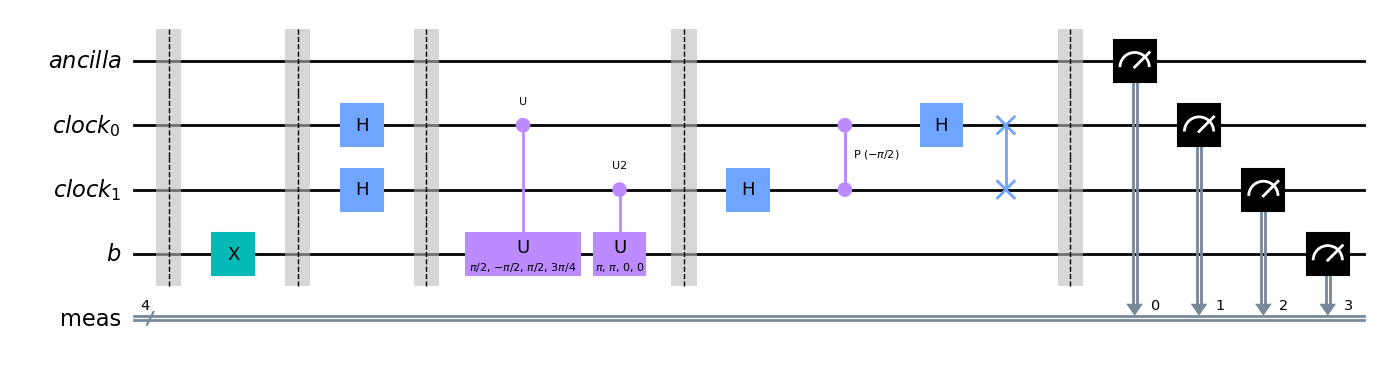

In [57]:
# Register declaration
clock = QuantumRegister(2, name='clock')
input_ = QuantumRegister(1, name='b')
ancilla = QuantumRegister(1, name='ancilla')
circuit3 = QuantumCircuit(ancilla, clock, input_)
#---------------Psi 0--------------------------
circuit3.barrier()
circuit3.x(input_);
#---------------Psi 1--------------------------
circuit3.barrier();
circuit3.h(clock[0]);
circuit3.h(clock[1]);
#--------------Psi 2---------------------------
circuit3.barrier();
# e^{i*A*t}
circuit3.cu(np.pi/2, -np.pi/2, np.pi/2, 3*np.pi/4, clock[0], input_, label='U');
    
# e^{i*A*t*2}
circuit3.cu(np.pi, np.pi, 0, 0, clock[1], input_, label='U2');

#--------------Psi 3---------------------------
circuit3.barrier();     
circuit3.h(clock[1]);
for j in reversed(range(2)):
    for k in reversed(range(j+1,2)):
        circuit3.cp(-np.pi/float(2**(k-j)), clock[k], clock[j]); #cu1 changes to cp in the new version
circuit3.h(clock[0]);
circuit3.swap(clock[0], clock[1]);
circuit3.measure_all();
circuit3.draw(output='mpl',idle_wires=False)

#--------------Psi 4---------------------------

Transpile the circuit

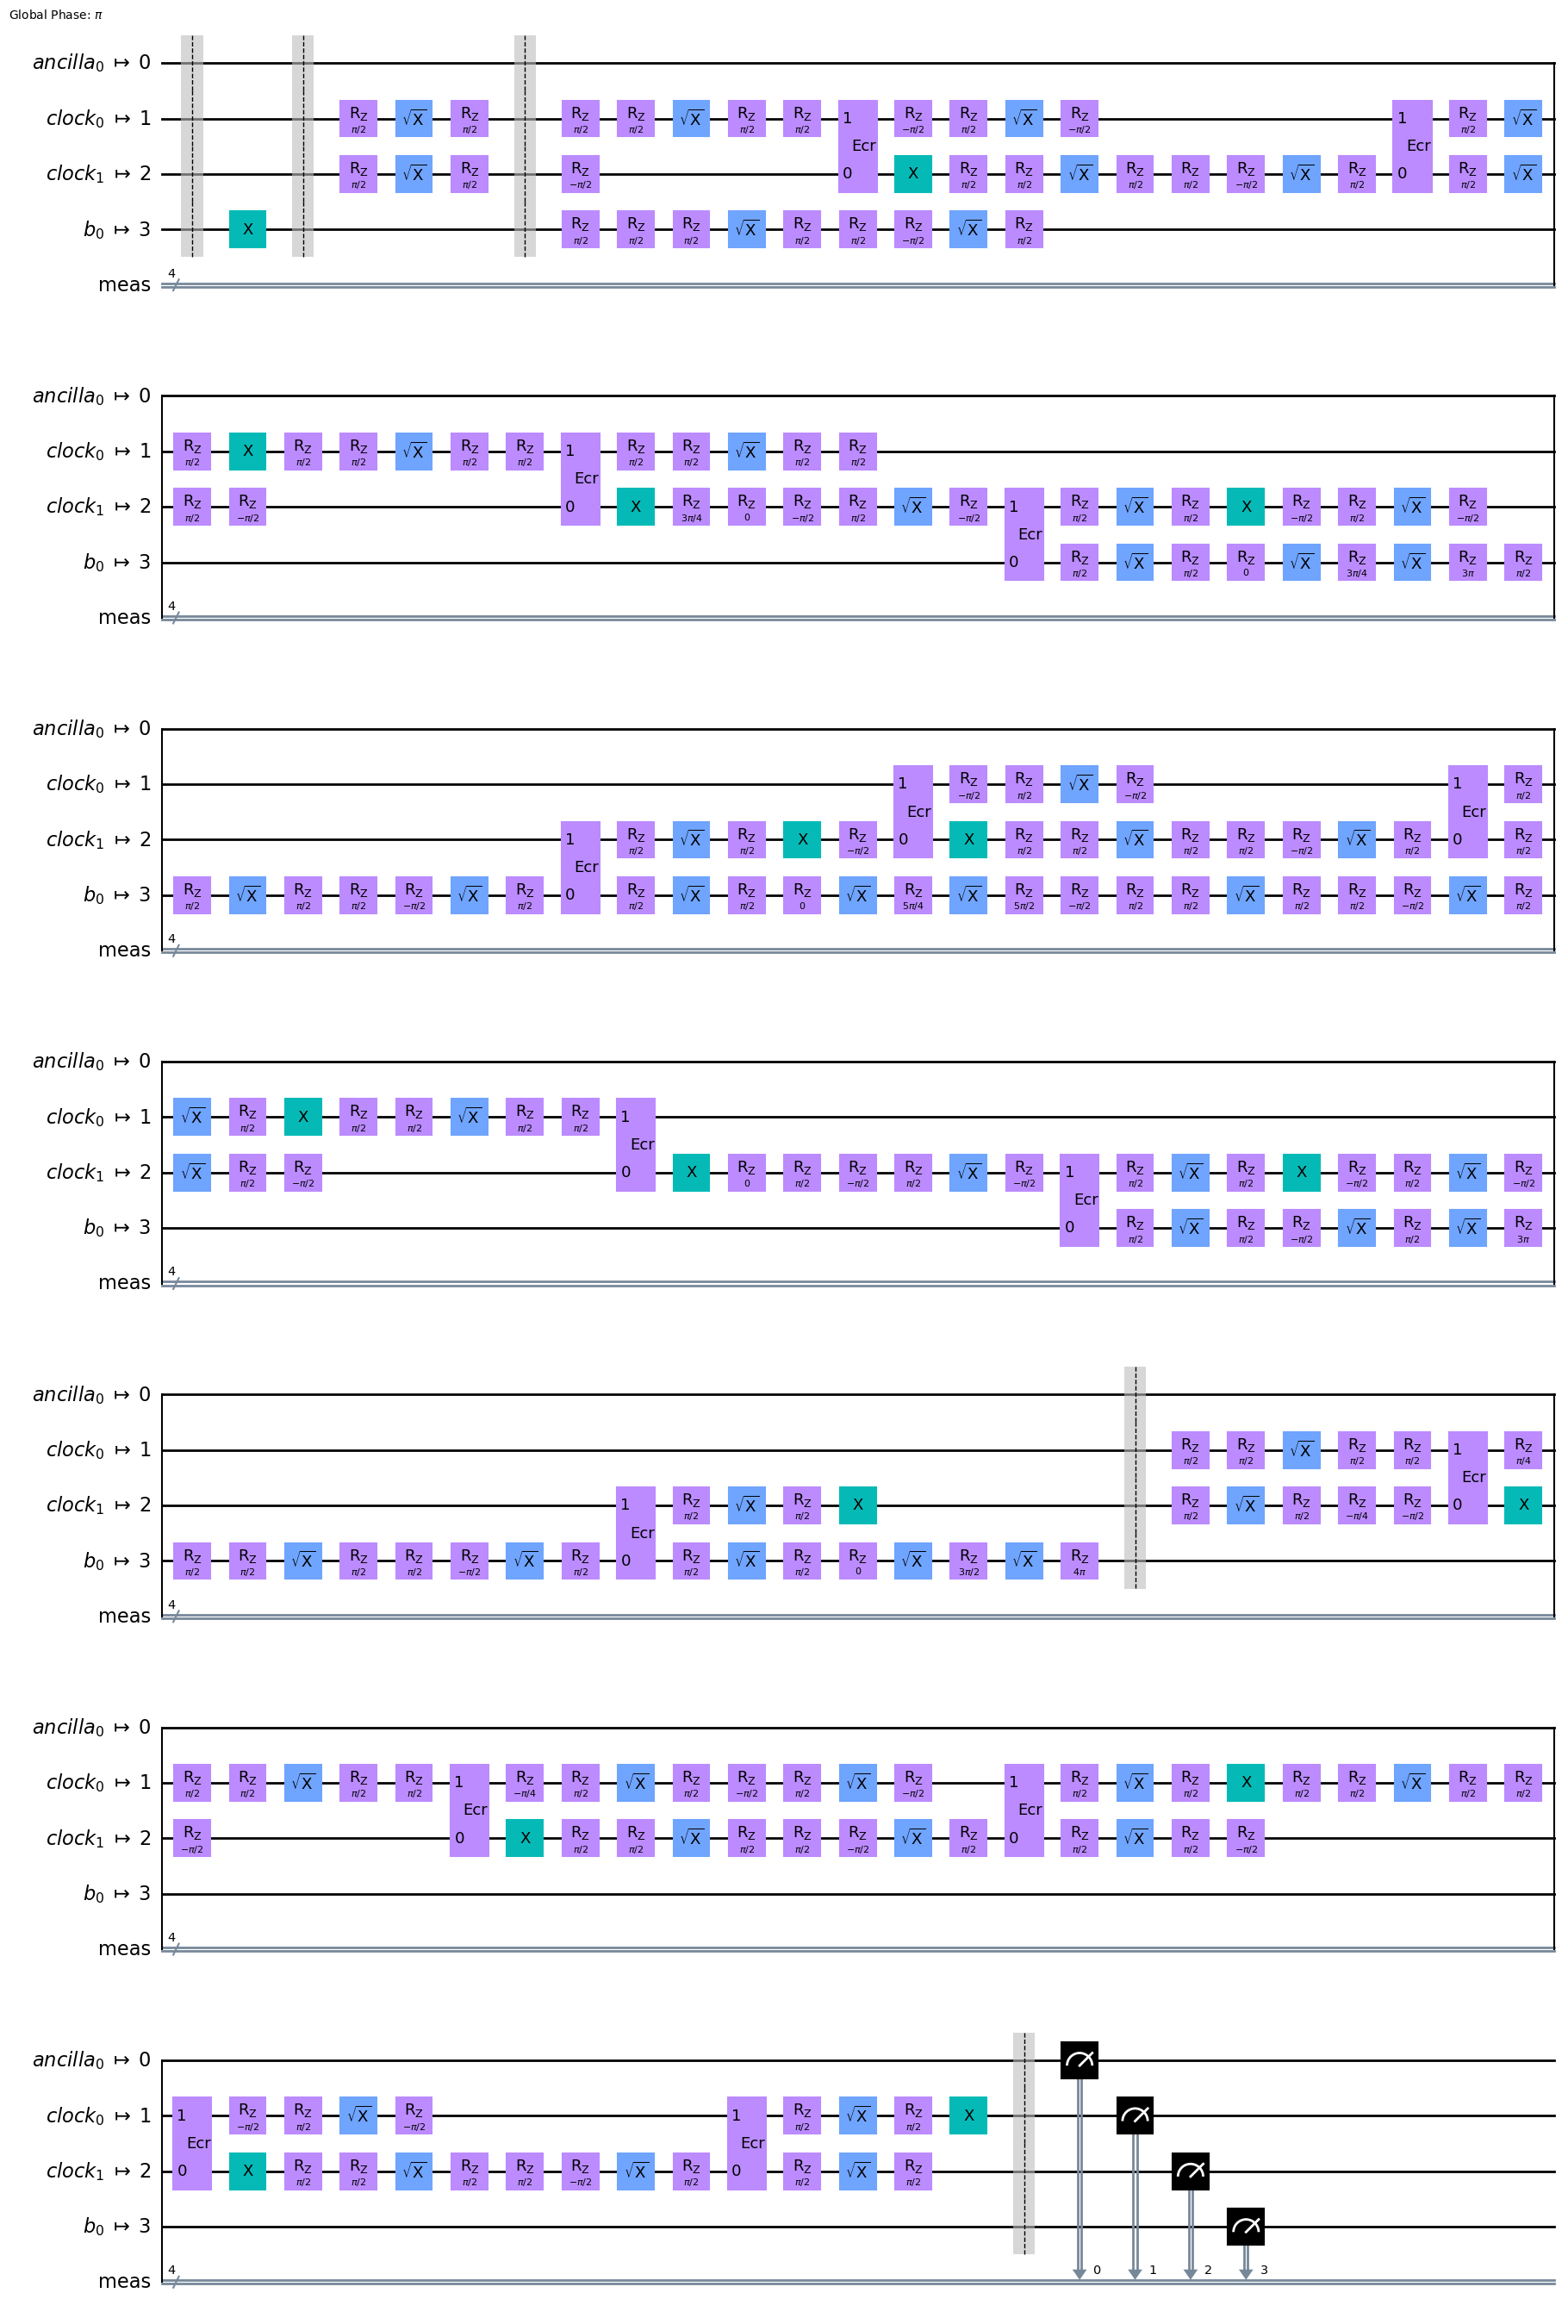

In [59]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()
transpiled_ckt3 = transpile(circuit3, provider.get_backend('ibm_brisbane'), seed_transpiler = 13,optimization_level=0) 
transpiled_ckt3.draw(output = 'mpl',idle_wires=False)

In [60]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Options
 
service = QiskitRuntimeService()
options = Options()
options.resilience_level = 0
options.optimization_level = 0
#backend = service.least_busy(operational=True, simulator=False)
 
example_circuit = transpiled_ckt3
service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
sampler = Sampler(backend, options=options)
job = sampler.run(example_circuit)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: cr45ymj0dz600086nkwg
SamplerResult(quasi_dists=[{2: 0.25625, 9: 0.0065, 0: 0.07325, 15: 0.00775, 11: 0.0095, 7: 0.008, 5: 0.00675, 14: 0.1185, 13: 0.00825, 3: 0.017, 6: 0.07725, 12: 0.08, 10: 0.132, 8: 0.1215, 4: 0.07125, 1: 0.00625}], metadata=[{'shots': 4000, 'circuit_metadata': {}}])


C:\Users\mridu\AppData\Local\Temp\ipykernel_17096\2942949.py:2: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(binary_prob)


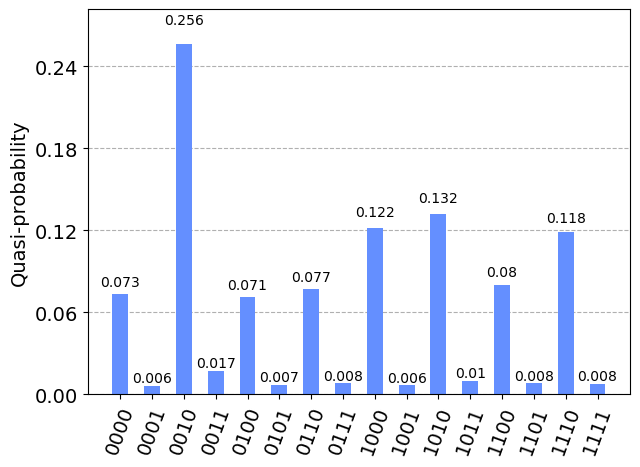

In [61]:
binary_prob = [quasi_dist.binary_probabilities() for quasi_dist in result.quasi_dists]
plot_histogram(binary_prob)

In [62]:
import csv

data1 = binary_prob

# Fill in missing values in data1 with zeros
filled_data1 = []
for d in data1:
    filled_row = {key: d.get(key, 0) for key in all_combinations}
    filled_data1.append(filled_row)

# Append filled_data1 to filled_data
filled_data.extend(filled_data1)

# Write the updated filled_data to the same CSV file
csv_file = "data.csv"
with open(csv_file, mode='a', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=all_combinations)
    for row in filled_data1:
        writer.writerow(row)

print(f"Data1 has been added to {csv_file}")

Data1 has been added to data.csv


Psi 5

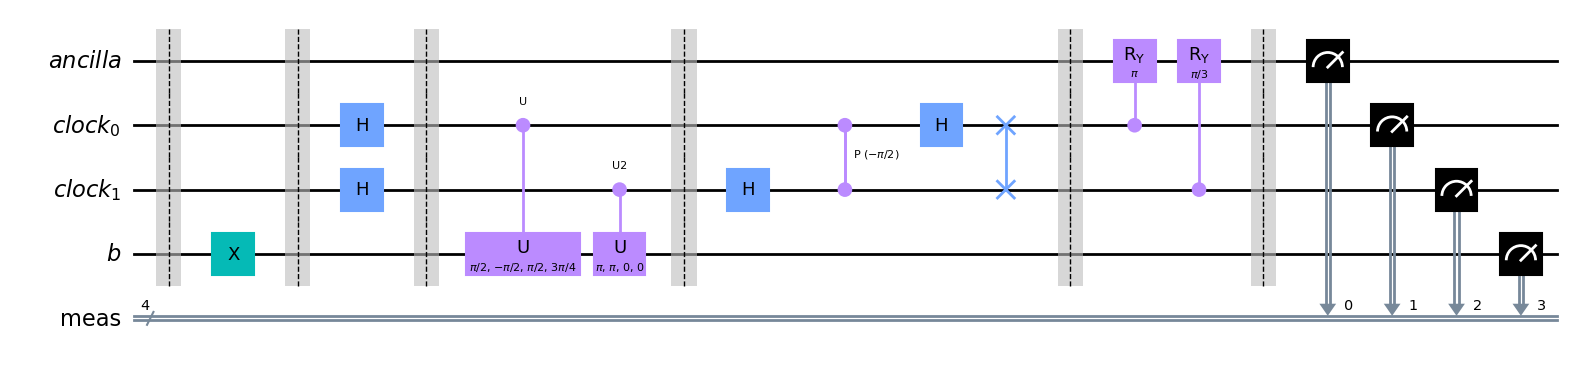

In [63]:
# Register declaration
clock = QuantumRegister(2, name='clock')
input_ = QuantumRegister(1, name='b')
ancilla = QuantumRegister(1, name='ancilla')
circuit4 = QuantumCircuit(ancilla, clock, input_)
#---------------Psi 0--------------------------
circuit4.barrier()
circuit4.x(input_);
#---------------Psi 1--------------------------
circuit4.barrier();
circuit4.h(clock[0]);
circuit4.h(clock[1]);
#--------------Psi 2---------------------------
circuit4.barrier();
# e^{i*A*t}
circuit4.cu(np.pi/2, -np.pi/2, np.pi/2, 3*np.pi/4, clock[0], input_, label='U');
    
# e^{i*A*t*2}
circuit4.cu(np.pi, np.pi, 0, 0, clock[1], input_, label='U2');

#--------------Psi 3---------------------------
circuit4.barrier();     
circuit4.h(clock[1]);
for j in reversed(range(2)):
    for k in reversed(range(j+1,2)):
        circuit4.cp(-np.pi/float(2**(k-j)), clock[k], clock[j]); #cu1 changes to cp in the new version
circuit4.h(clock[0]);
circuit4.swap(clock[0], clock[1]);
#--------------Psi 4---------------------------
circuit4.barrier();
circuit4.cry(np.pi, clock[0], ancilla);
circuit4.cry(np.pi/3, clock[1], ancilla);
circuit4.measure_all()
circuit4.draw(output='mpl',idle_wires=False)
#--------------Psi 5---------------------------

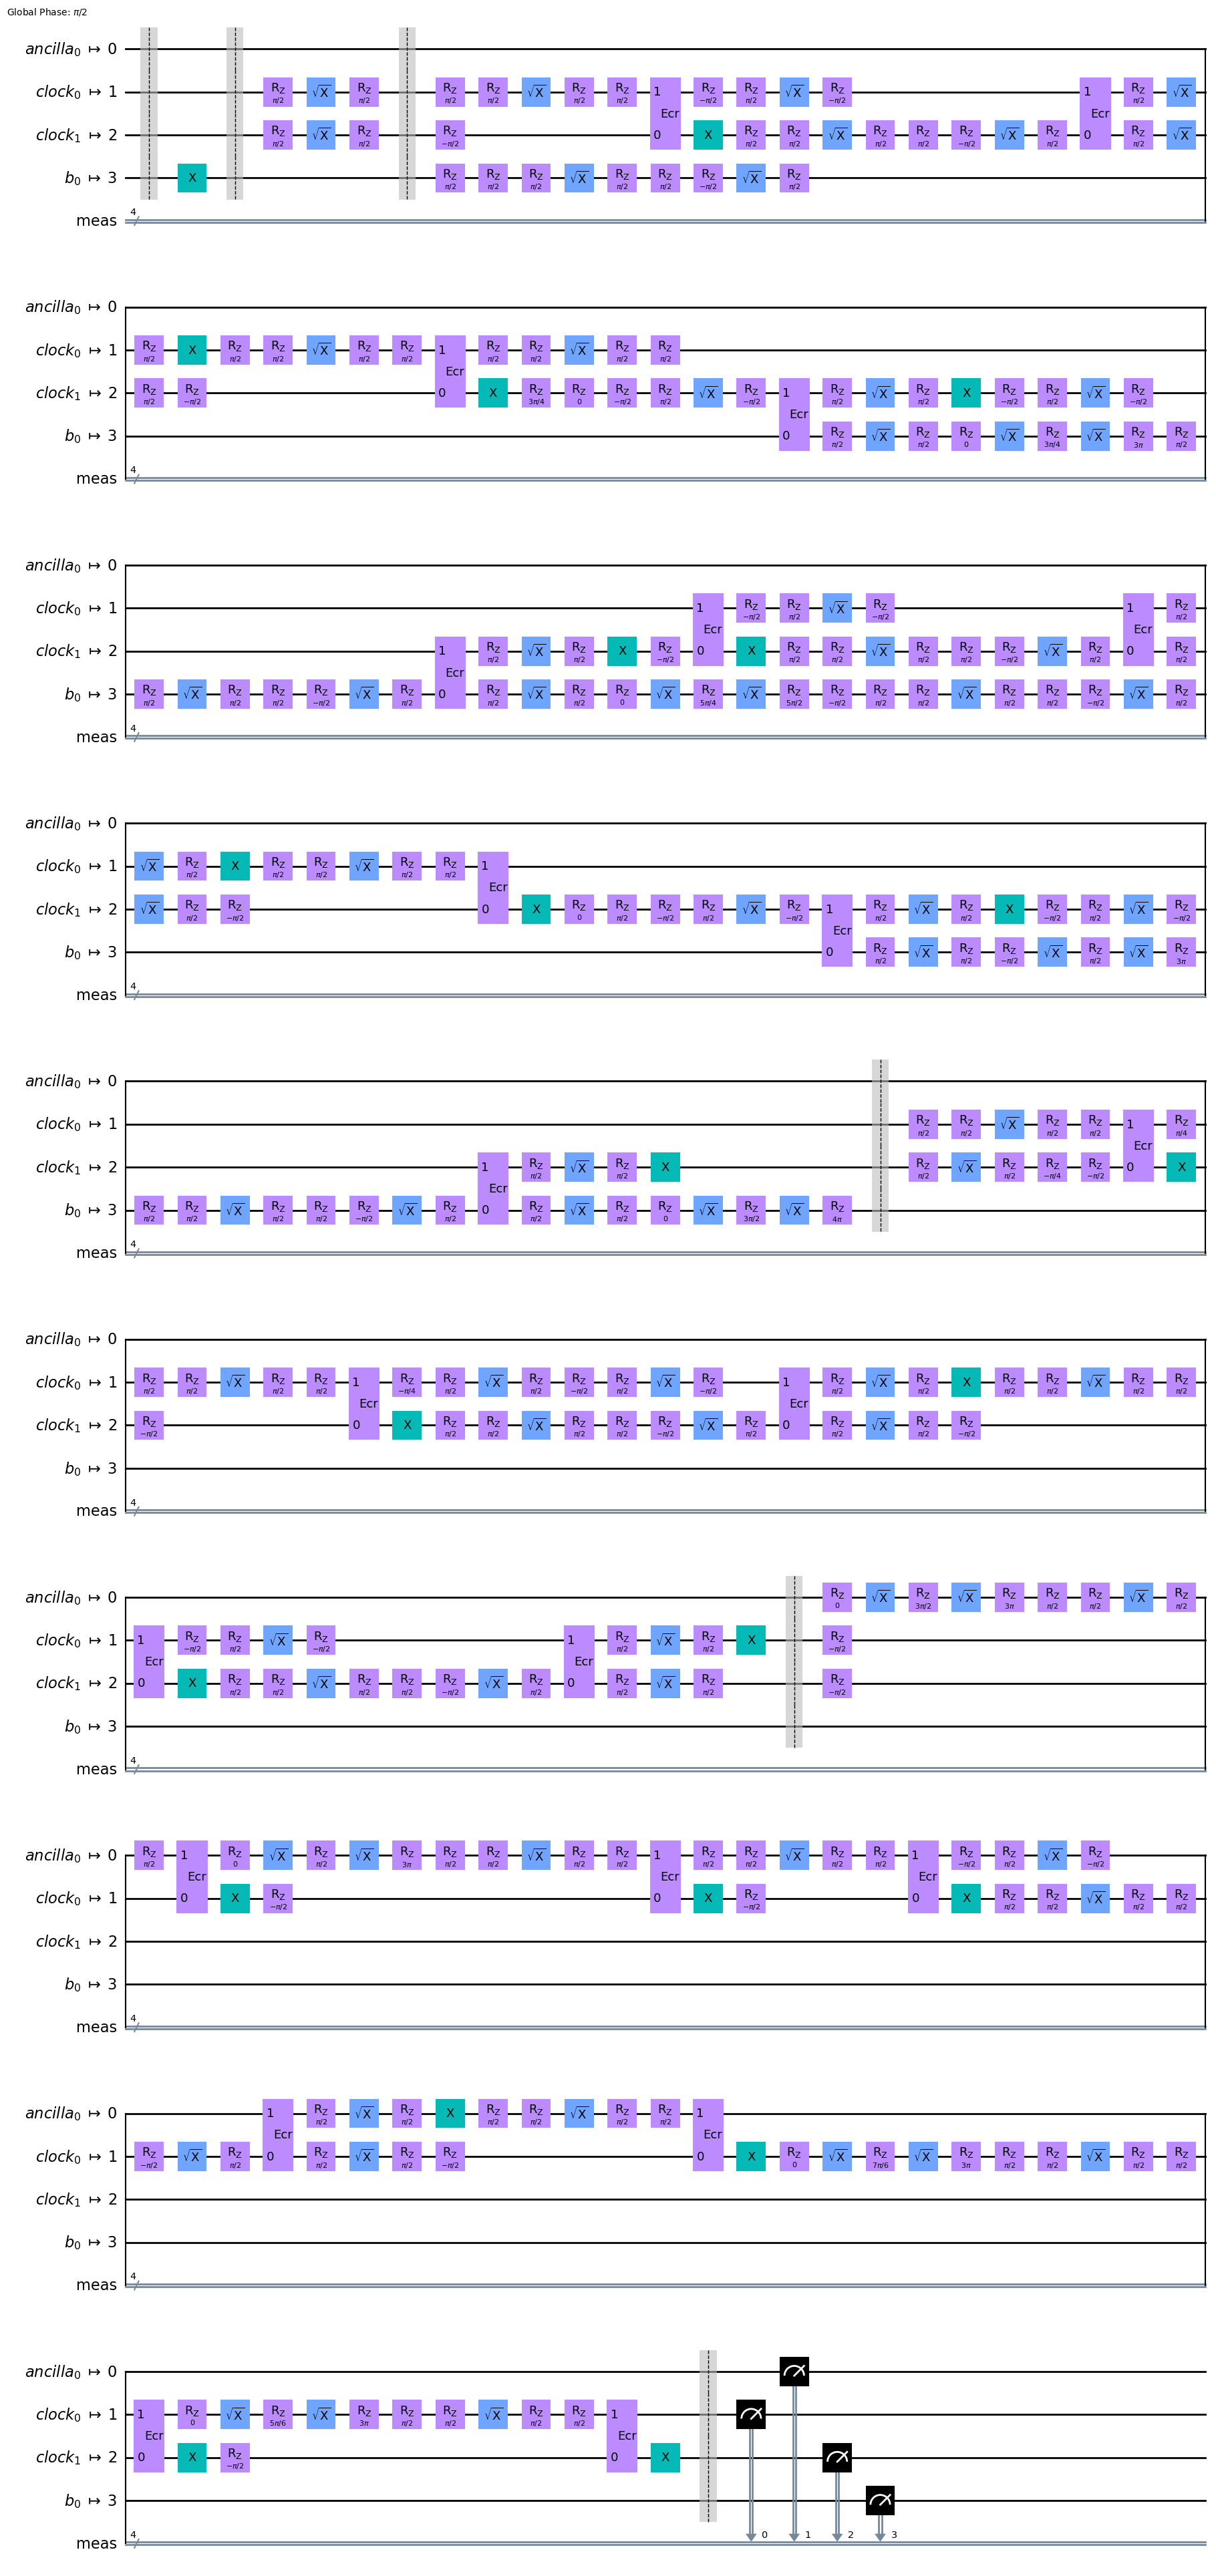

In [64]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()
transpiled_ckt4 = transpile(circuit4, provider.get_backend('ibm_brisbane'), seed_transpiler = 13,optimization_level=0) 
transpiled_ckt4.draw(output = 'mpl',idle_wires=False)

In [65]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Options
 
service = QiskitRuntimeService()
options = Options()
options.resilience_level = 0
options.optimization_level = 0
#backend = service.least_busy(operational=True, simulator=False)
 
example_circuit = transpiled_ckt4
service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
sampler = Sampler(backend, options=options)
job = sampler.run(example_circuit)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: cr46rfh8091g008jnfjg
SamplerResult(quasi_dists=[{0: 0.06175, 2: 0.01025, 12: 0.06075, 6: 0.032, 5: 0.0235, 4: 0.0545, 10: 0.01375, 15: 0.0855, 14: 0.04225, 8: 0.12075, 9: 0.00825, 7: 0.04775, 11: 0.1405, 13: 0.033, 1: 0.00575, 3: 0.25975}], metadata=[{'shots': 4000, 'circuit_metadata': {}}])


C:\Users\mridu\AppData\Local\Temp\ipykernel_17096\2942949.py:2: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(binary_prob)


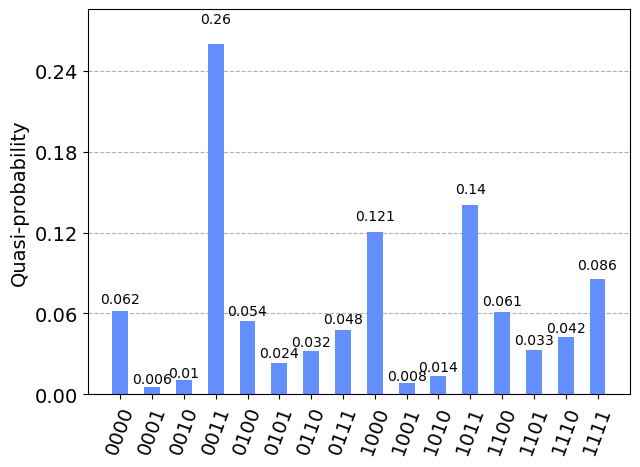

In [66]:
binary_prob = [quasi_dist.binary_probabilities() for quasi_dist in result.quasi_dists]
plot_histogram(binary_prob)

In [67]:
import csv

data1 = binary_prob

# Fill in missing values in data1 with zeros
filled_data1 = []
for d in data1:
    filled_row = {key: d.get(key, 0) for key in all_combinations}
    filled_data1.append(filled_row)

# Append filled_data1 to filled_data
filled_data.extend(filled_data1)

# Write the updated filled_data to the same CSV file
csv_file = "data.csv"
with open(csv_file, mode='a', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=all_combinations)
    for row in filled_data1:
        writer.writerow(row)

print(f"Data1 has been added to {csv_file}")

Data1 has been added to data.csv


Psi 6

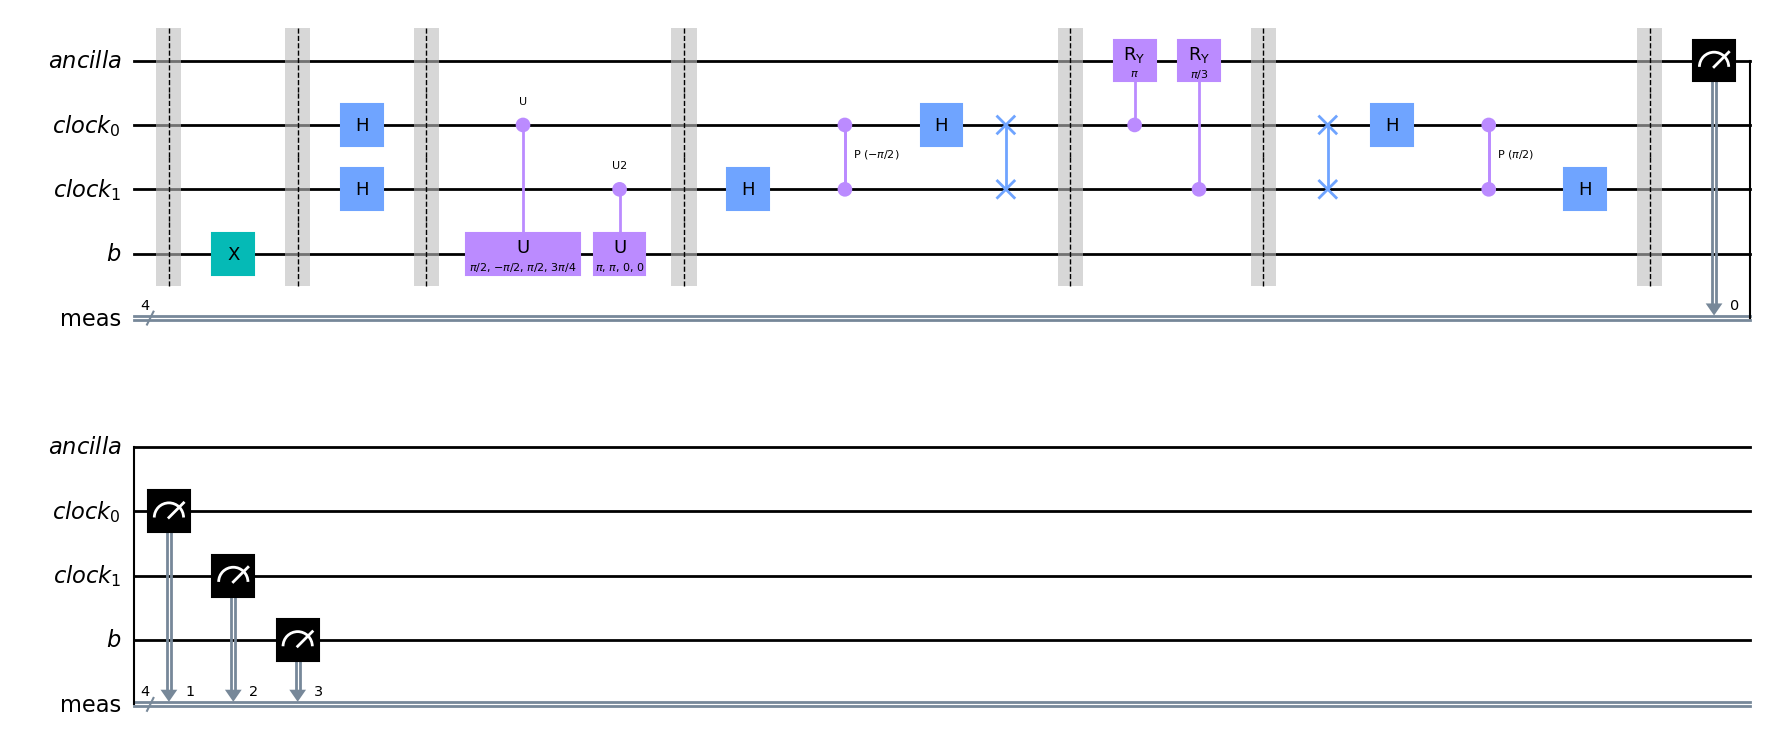

In [68]:
# Register declaration
clock = QuantumRegister(2, name='clock')
input_ = QuantumRegister(1, name='b')
ancilla = QuantumRegister(1, name='ancilla')
circuit5 = QuantumCircuit(ancilla, clock, input_)
#---------------Psi 0--------------------------
circuit5.barrier()
circuit5.x(input_);
#---------------Psi 1--------------------------
circuit5.barrier();
circuit5.h(clock[0]);
circuit5.h(clock[1]);
#--------------Psi 2---------------------------
circuit5.barrier();
# e^{i*A*t}
circuit5.cu(np.pi/2, -np.pi/2, np.pi/2, 3*np.pi/4, clock[0], input_, label='U');
    
# e^{i*A*t*2}
circuit5.cu(np.pi, np.pi, 0, 0, clock[1], input_, label='U2');

#--------------Psi 3---------------------------
circuit5.barrier();     
circuit5.h(clock[1]);
for j in reversed(range(2)):
    for k in reversed(range(j+1,2)):
        circuit5.cp(-np.pi/float(2**(k-j)), clock[k], clock[j]); #cu1 changes to cp in the new version
circuit5.h(clock[0]);
circuit5.swap(clock[0], clock[1]);
#--------------Psi 4---------------------------
circuit5.barrier();
circuit5.cry(np.pi, clock[0], ancilla);
circuit5.cry(np.pi/3, clock[1], ancilla);
#--------------Psi 5---------------------------
circuit5.barrier();
circuit5.swap(clock[0], clock[1]);
circuit5.h(clock[0]);
for j in reversed(range(2)):
    for k in reversed(range(j+1,2)):
        circuit5.cp(np.pi/float(2**(k-j)), clock[k], clock[j]);
circuit5.h(clock[1])
circuit5.measure_all()
circuit5.draw(output='mpl',idle_wires=False)
#--------------Psi 6---------------------------

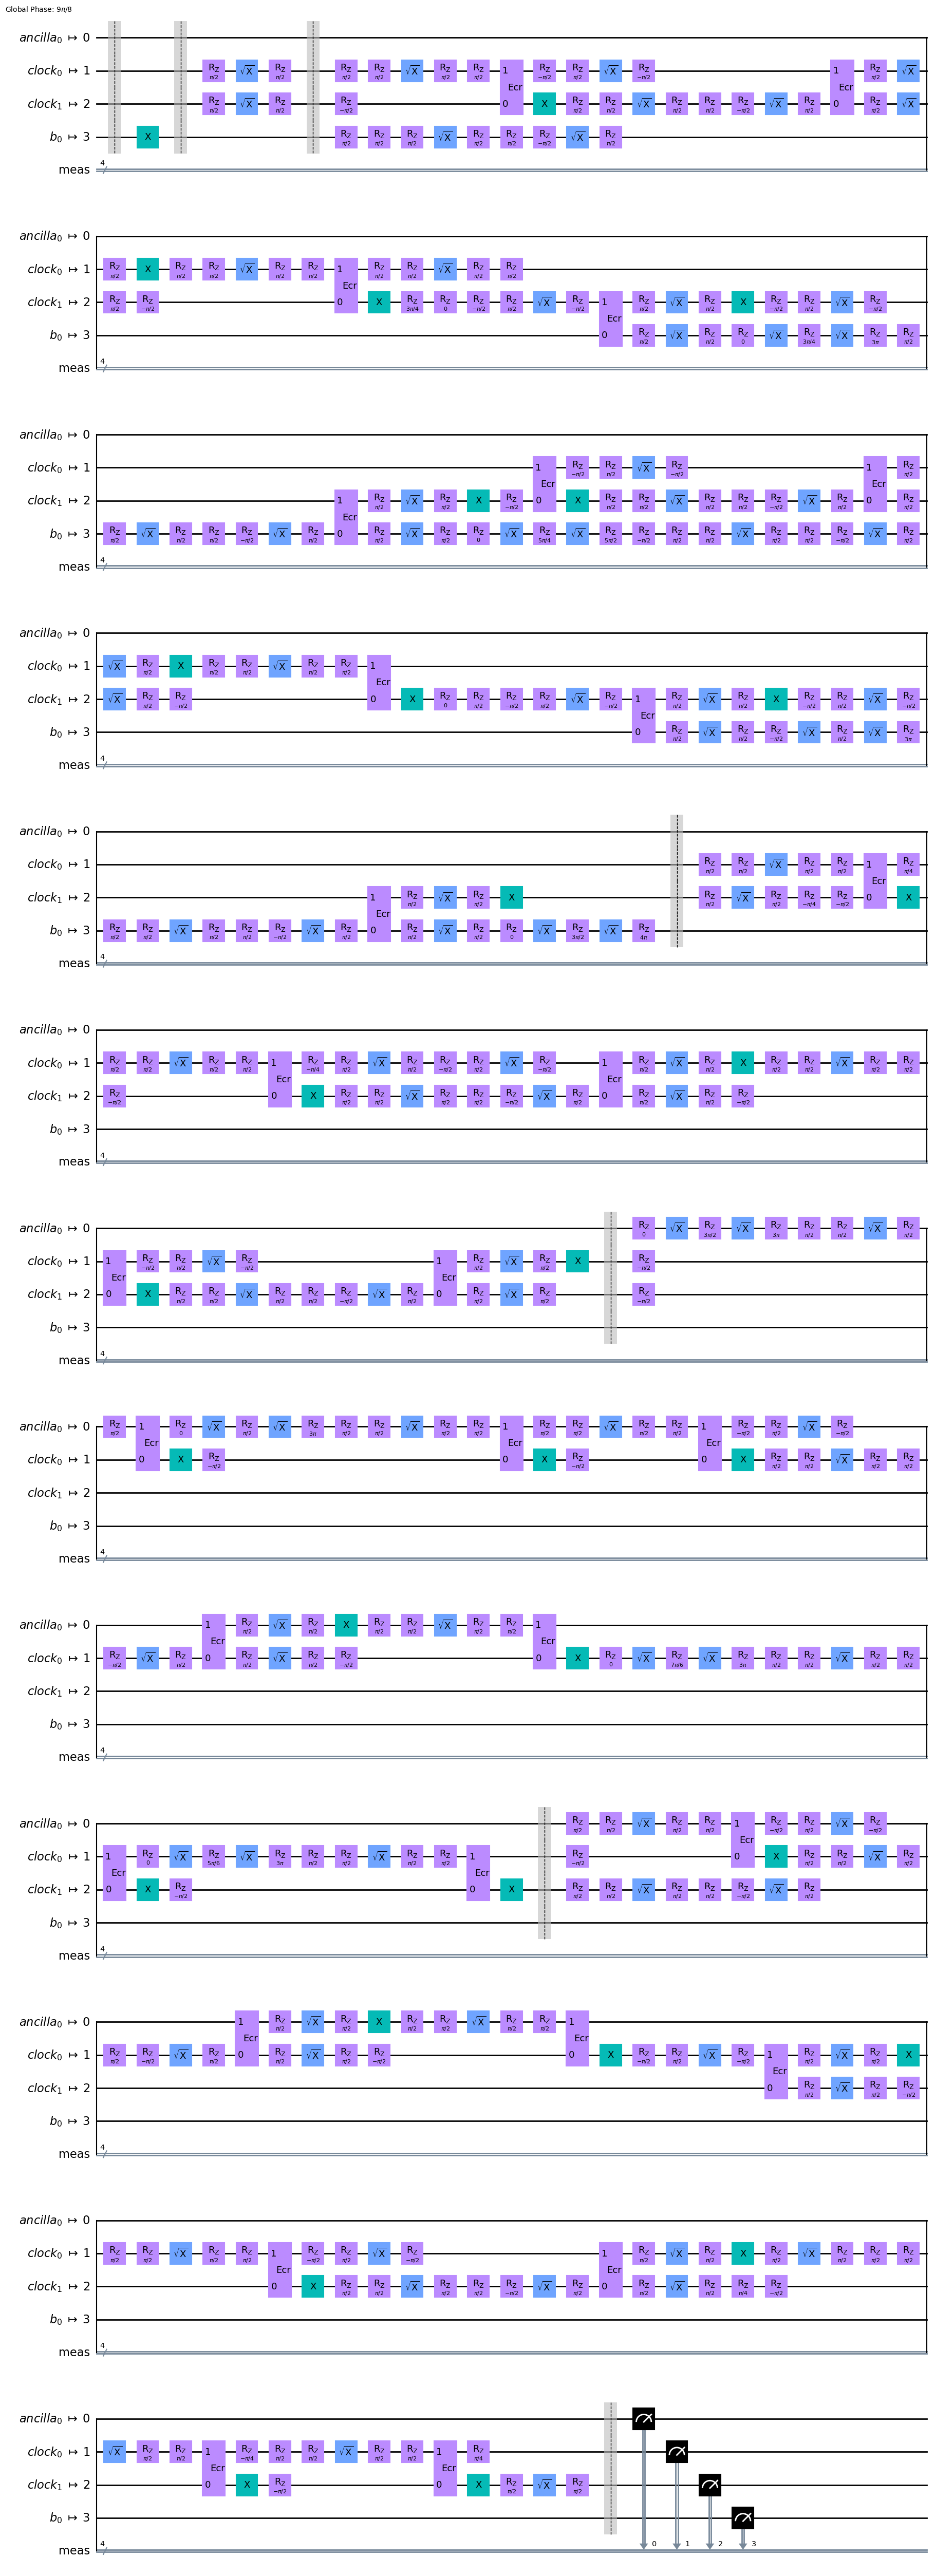

In [69]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()
transpiled_ckt5 = transpile(circuit5, provider.get_backend('ibm_brisbane'), seed_transpiler = 13,optimization_level=0) 
transpiled_ckt5.draw(output = 'mpl',idle_wires=False)

In [70]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Options
 
service = QiskitRuntimeService()
options = Options()
options.resilience_level = 0
options.optimization_level = 0
#backend = service.least_busy(operational=True, simulator=False)
 
example_circuit = transpiled_ckt5
service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
sampler = Sampler(backend, options=options)
job = sampler.run(example_circuit)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: cr46z9x8091g008jng6g
SamplerResult(quasi_dists=[{8: 0.0495, 1: 0.12725, 9: 0.1, 2: 0.05725, 0: 0.03325, 15: 0.05625, 14: 0.041, 5: 0.09, 6: 0.0295, 12: 0.042, 13: 0.0565, 11: 0.0385, 10: 0.101, 3: 0.0805, 4: 0.0385, 7: 0.059}], metadata=[{'shots': 4000, 'circuit_metadata': {}}])


C:\Users\mridu\AppData\Local\Temp\ipykernel_17096\2942949.py:2: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(binary_prob)


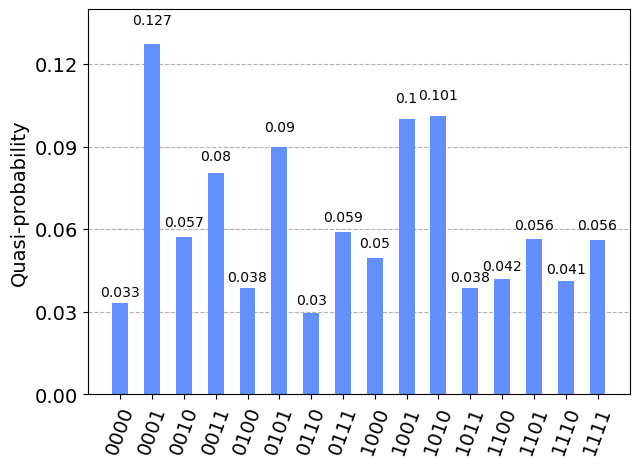

In [71]:
binary_prob = [quasi_dist.binary_probabilities() for quasi_dist in result.quasi_dists]
plot_histogram(binary_prob)

In [72]:
import csv

data1 = binary_prob

# Fill in missing values in data1 with zeros
filled_data1 = []
for d in data1:
    filled_row = {key: d.get(key, 0) for key in all_combinations}
    filled_data1.append(filled_row)

# Append filled_data1 to filled_data
filled_data.extend(filled_data1)

# Write the updated filled_data to the same CSV file
csv_file = "data.csv"
with open(csv_file, mode='a', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=all_combinations)
    for row in filled_data1:
        writer.writerow(row)

print(f"Data1 has been added to {csv_file}")

Data1 has been added to data.csv


Psi 7

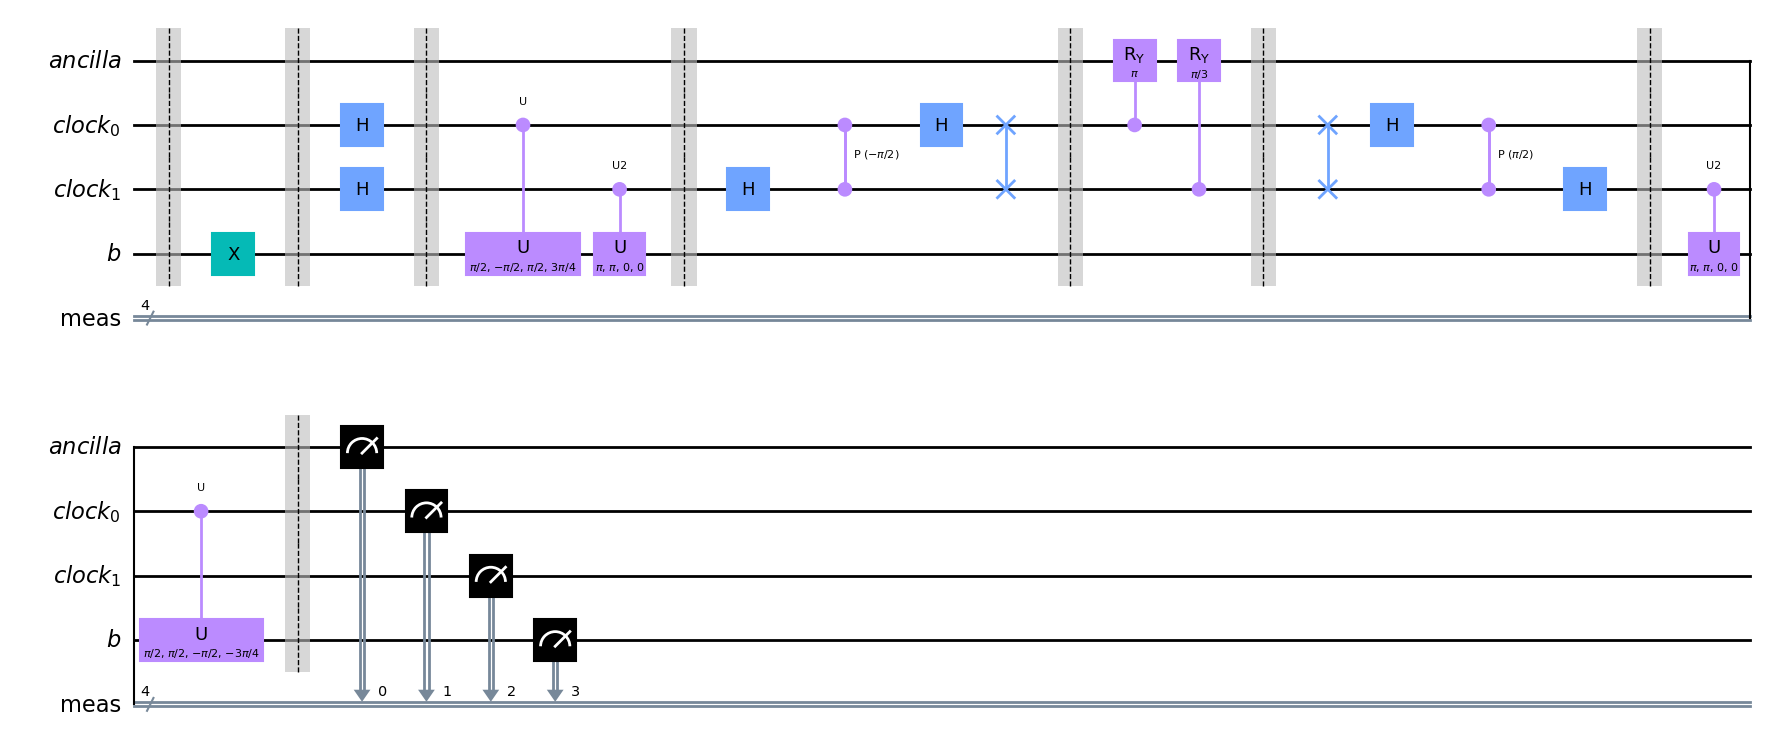

In [73]:
# Register declaration
clock = QuantumRegister(2, name='clock')
input_ = QuantumRegister(1, name='b')
ancilla = QuantumRegister(1, name='ancilla')
circuit6 = QuantumCircuit(ancilla, clock, input_)
#---------------Psi 0--------------------------
circuit6.barrier()
circuit6.x(input_);
#---------------Psi 1--------------------------
circuit6.barrier();
circuit6.h(clock[0]);
circuit6.h(clock[1]);
#--------------Psi 2---------------------------
circuit6.barrier();
# e^{i*A*t}
circuit6.cu(np.pi/2, -np.pi/2, np.pi/2, 3*np.pi/4, clock[0], input_, label='U');
    
# e^{i*A*t*2}
circuit6.cu(np.pi, np.pi, 0, 0, clock[1], input_, label='U2');

#--------------Psi 3---------------------------
circuit6.barrier();     
circuit6.h(clock[1]);
for j in reversed(range(2)):
    for k in reversed(range(j+1,2)):
        circuit6.cp(-np.pi/float(2**(k-j)), clock[k], clock[j]); #cu1 changes to cp in the new version
circuit6.h(clock[0]);
circuit6.swap(clock[0], clock[1]);
#--------------Psi 4---------------------------
circuit6.barrier();
circuit6.cry(np.pi, clock[0], ancilla);
circuit6.cry(np.pi/3, clock[1], ancilla);
#--------------Psi 5---------------------------
circuit6.barrier();
circuit6.swap(clock[0], clock[1]);
circuit6.h(clock[0]);
for j in reversed(range(2)):
    for k in reversed(range(j+1,2)):
        circuit6.cp(np.pi/float(2**(k-j)), clock[k], clock[j]);
circuit6.h(clock[1])
#--------------Psi 6---------------------------
circuit6.barrier();
circuit6.cu(np.pi, np.pi, 0, 0, clock[1], input_, label='U2');
# e^{i*A*t}
circuit6.cu(np.pi/2, np.pi/2, -np.pi/2, -3*np.pi/4, clock[0], input_, label='U');
circuit6.measure_all()
circuit6.draw(output='mpl',idle_wires=False)
#--------------Psi 7--------------------------

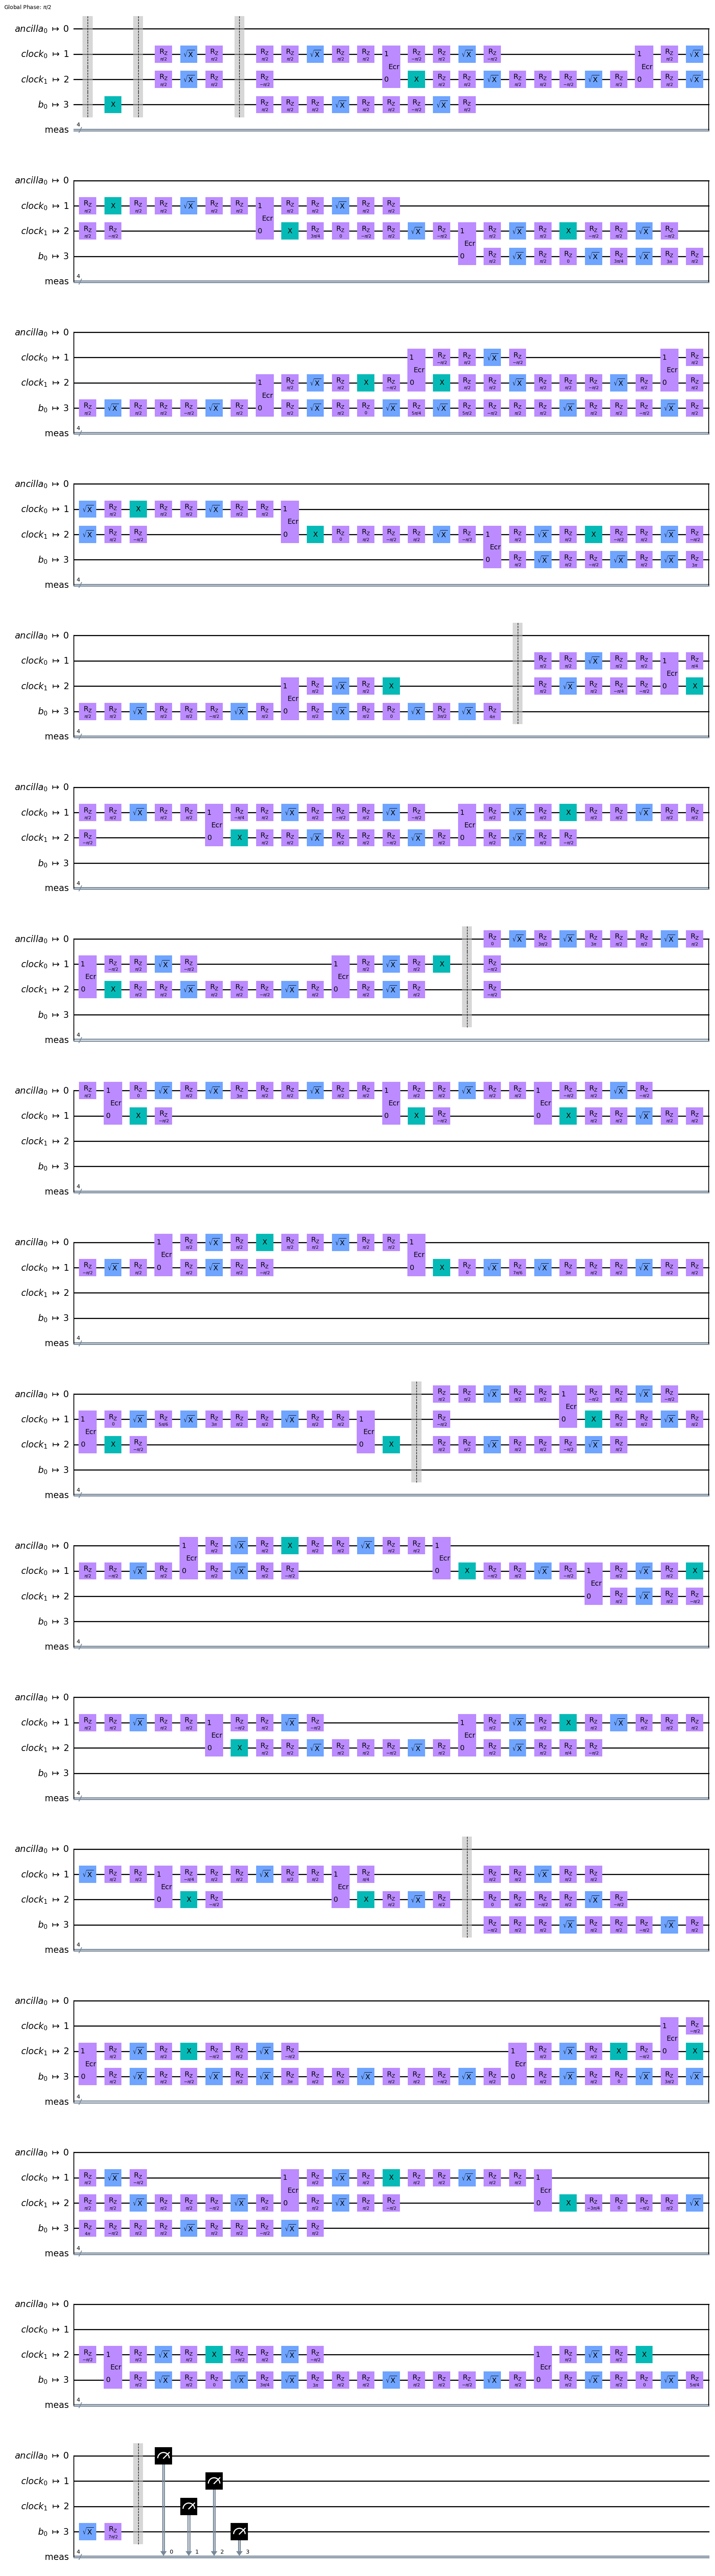

In [74]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()
transpiled_ckt6 = transpile(circuit6, provider.get_backend('ibm_brisbane'), seed_transpiler = 13,optimization_level=0) 
transpiled_ckt6.draw(output = 'mpl',idle_wires=False)

In [75]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Options
 
service = QiskitRuntimeService()
options = Options()
options.resilience_level = 0
options.optimization_level = 0
#backend = service.least_busy(operational=True, simulator=False)
 
example_circuit = transpiled_ckt6
service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
sampler = Sampler(backend, options=options)
job = sampler.run(example_circuit)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: cr47291bbwk00089z0k0
SamplerResult(quasi_dists=[{10: 0.094, 11: 0.05225, 8: 0.03475, 6: 0.035, 5: 0.0425, 13: 0.0665, 9: 0.083, 3: 0.07175, 7: 0.10525, 2: 0.035, 1: 0.098, 15: 0.093, 4: 0.0405, 0: 0.0405, 14: 0.06775, 12: 0.04025}], metadata=[{'shots': 4000, 'circuit_metadata': {}}])


C:\Users\mridu\AppData\Local\Temp\ipykernel_17096\2942949.py:2: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(binary_prob)


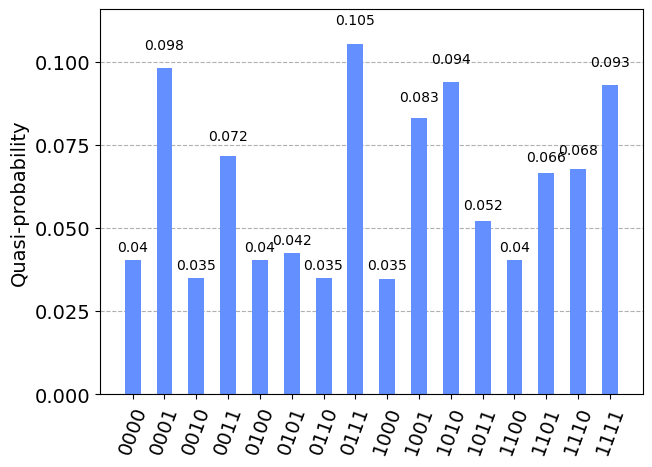

In [76]:
binary_prob = [quasi_dist.binary_probabilities() for quasi_dist in result.quasi_dists]
plot_histogram(binary_prob)

In [77]:
import csv

data1 = binary_prob

# Fill in missing values in data1 with zeros
filled_data1 = []
for d in data1:
    filled_row = {key: d.get(key, 0) for key in all_combinations}
    filled_data1.append(filled_row)

# Append filled_data1 to filled_data
filled_data.extend(filled_data1)

# Write the updated filled_data to the same CSV file
csv_file = "data.csv"
with open(csv_file, mode='a', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=all_combinations)
    for row in filled_data1:
        writer.writerow(row)

print(f"Data1 has been added to {csv_file}")

Data1 has been added to data.csv


Psi 8

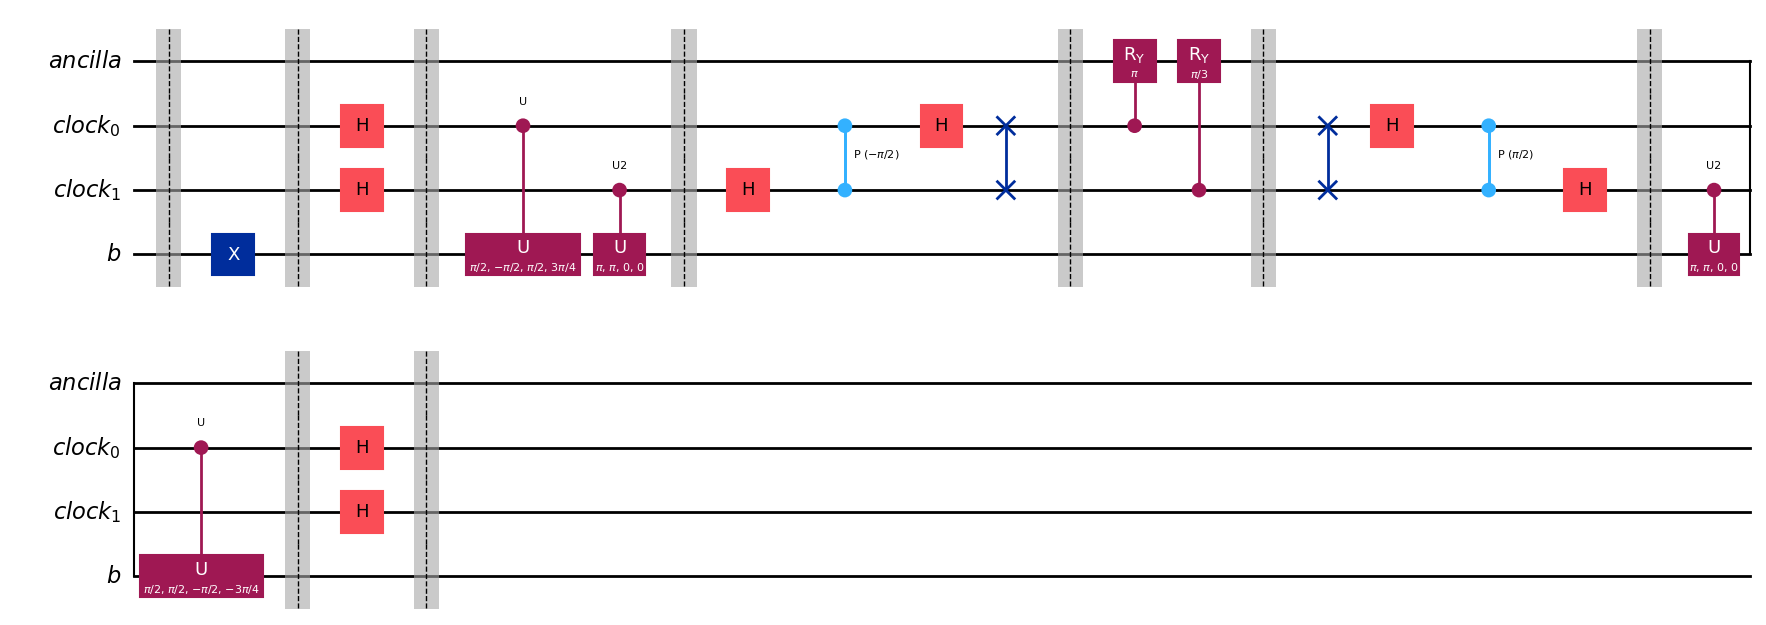

In [78]:
# Register declaration
clock = QuantumRegister(2, name='clock')
input_ = QuantumRegister(1, name='b')
ancilla = QuantumRegister(1, name='ancilla')
circuit7 = QuantumCircuit(ancilla, clock, input_)
#---------------Psi 0--------------------------
circuit7.barrier()
circuit7.x(input_);
#---------------Psi 1--------------------------
circuit7.barrier();
circuit7.h(clock[0]);
circuit7.h(clock[1]);
#--------------Psi 2---------------------------
circuit7.barrier();
# e^{i*A*t}
circuit7.cu(np.pi/2, -np.pi/2, np.pi/2, 3*np.pi/4, clock[0], input_, label='U');
    
# e^{i*A*t*2}
circuit7.cu(np.pi, np.pi, 0, 0, clock[1], input_, label='U2');

#--------------Psi 3---------------------------
circuit7.barrier();     
circuit7.h(clock[1]);
for j in reversed(range(2)):
    for k in reversed(range(j+1,2)):
        circuit7.cp(-np.pi/float(2**(k-j)), clock[k], clock[j]); #cu1 changes to cp in the new version
circuit7.h(clock[0]);
circuit7.swap(clock[0], clock[1]);
#--------------Psi 4---------------------------
circuit7.barrier();
circuit7.cry(np.pi, clock[0], ancilla);
circuit7.cry(np.pi/3, clock[1], ancilla);
#--------------Psi 5---------------------------
circuit7.barrier();
circuit7.swap(clock[0], clock[1]);
circuit7.h(clock[0]);
for j in reversed(range(2)):
    for k in reversed(range(j+1,2)):
        circuit7.cp(np.pi/float(2**(k-j)), clock[k], clock[j]);
circuit7.h(clock[1])
#--------------Psi 6---------------------------
circuit7.barrier();
circuit7.cu(np.pi, np.pi, 0, 0, clock[1], input_, label='U2');
# e^{i*A*t}
circuit7.cu(np.pi/2, np.pi/2, -np.pi/2, -3*np.pi/4, clock[0], input_, label='U');
#--------------Psi 7--------------------------
circuit7.barrier();
circuit7.h(clock[0]);
circuit7.h(clock[1]);
#--------------Psi 8---------------------------
circuit7.measure_all();
circuit.draw(output='mpl', style = 'iqp')

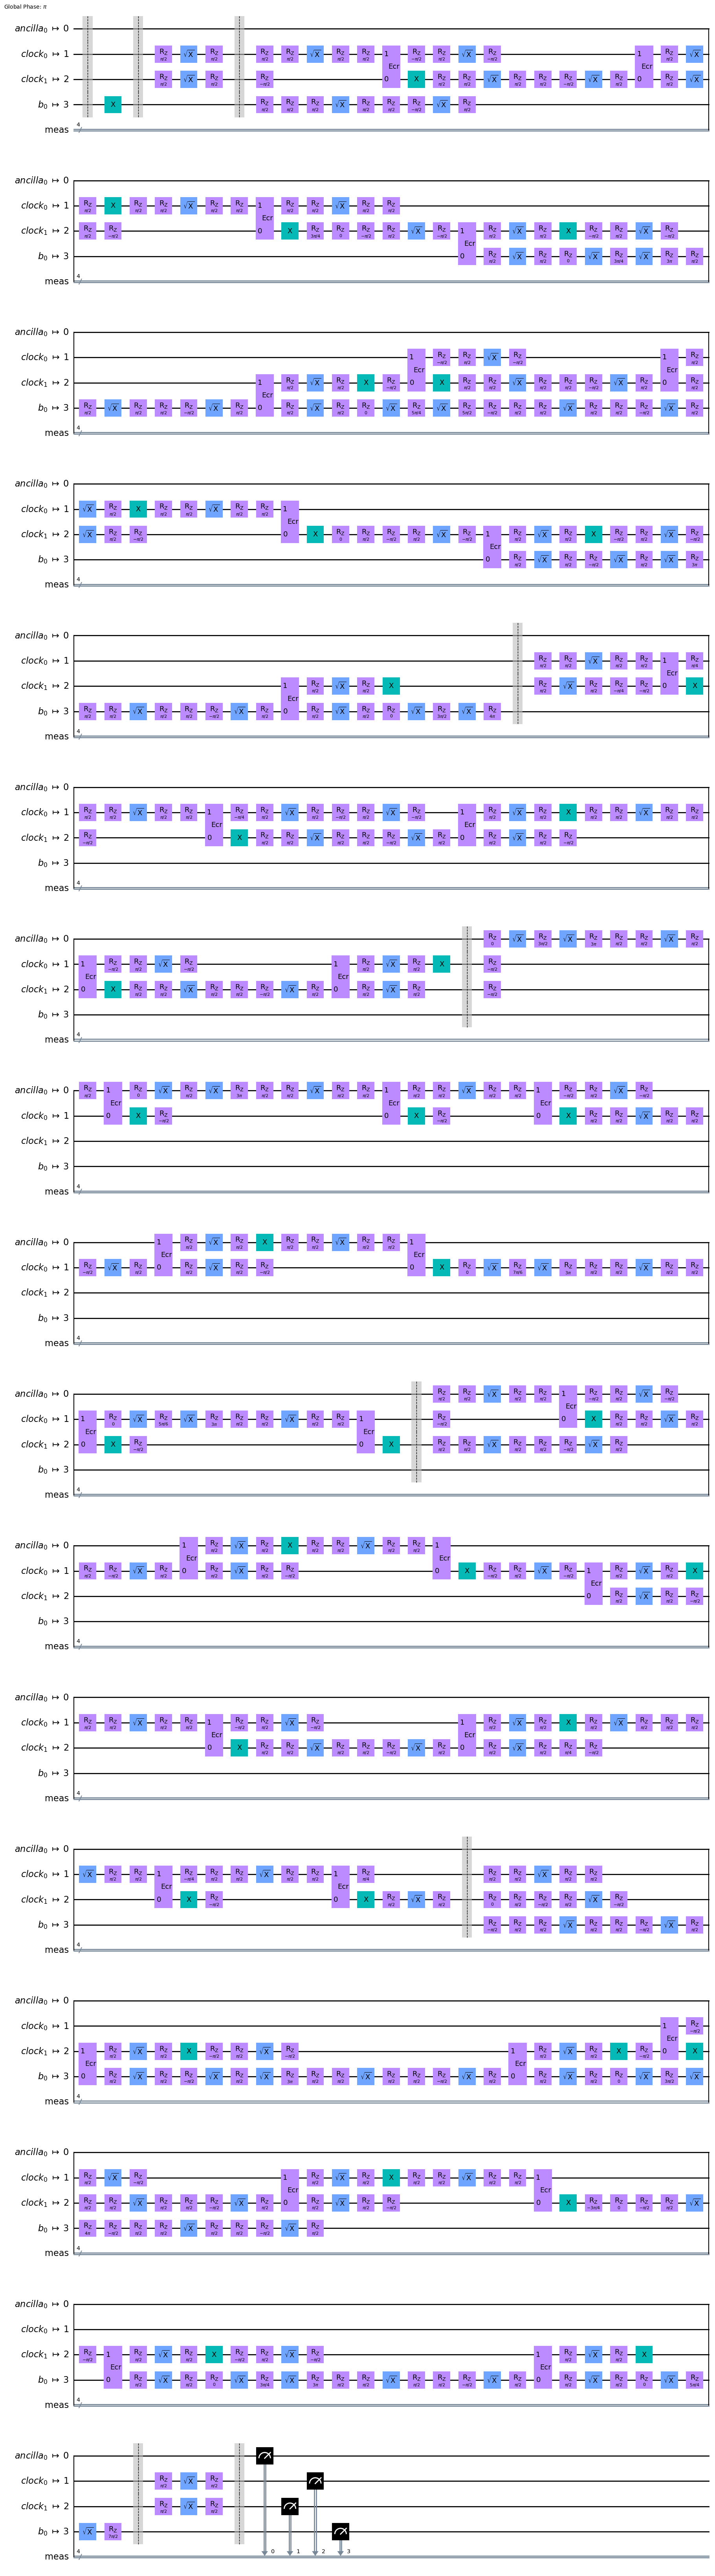

In [79]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()
transpiled_ckt7 = transpile(circuit7, provider.get_backend('ibm_brisbane'), seed_transpiler = 13,optimization_level=0) 
transpiled_ckt7.draw(output = 'mpl',idle_wires=False)

In [80]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Options
 
service = QiskitRuntimeService()
options = Options()
options.resilience_level = 0
options.optimization_level = 0
#backend = service.least_busy(operational=True, simulator=False)
 
example_circuit = transpiled_ckt7
service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
sampler = Sampler(backend, options=options)
job = sampler.run(example_circuit)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: cr476httxj100089y6b0
SamplerResult(quasi_dists=[{0: 0.039, 6: 0.04075, 9: 0.07675, 1: 0.09775, 3: 0.063, 4: 0.02875, 12: 0.0335, 13: 0.0515, 5: 0.1195, 11: 0.07, 2: 0.056, 14: 0.0355, 8: 0.0915, 10: 0.083, 15: 0.07425, 7: 0.03925}], metadata=[{'shots': 4000, 'circuit_metadata': {}}])


C:\Users\mridu\AppData\Local\Temp\ipykernel_17096\2942949.py:2: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(binary_prob)


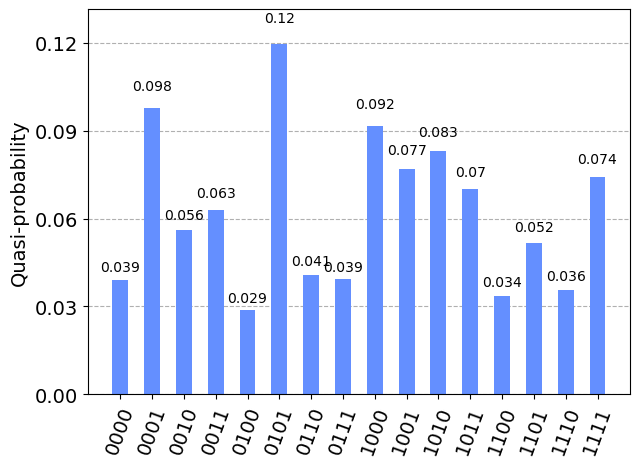

In [81]:
binary_prob = [quasi_dist.binary_probabilities() for quasi_dist in result.quasi_dists]
plot_histogram(binary_prob)

In [82]:
import csv

data1 = binary_prob

# Fill in missing values in data1 with zeros
filled_data1 = []
for d in data1:
    filled_row = {key: d.get(key, 0) for key in all_combinations}
    filled_data1.append(filled_row)

# Append filled_data1 to filled_data
filled_data.extend(filled_data1)

# Write the updated filled_data to the same CSV file
csv_file = "data.csv"
with open(csv_file, mode='a', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=all_combinations)
    for row in filled_data1:
        writer.writerow(row)

print(f"Data1 has been added to {csv_file}")

Data1 has been added to data.csv


END